In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import quandl

In [3]:
#PIPE para baixar os arquivos da plataforma quandl

quandl.ApiConfig.api_key = "cPsX-NYJ5QKYiiVVeFsj"

NameError: name 'quandl' is not defined

In [34]:
#DESCRIPTION
#Zinc; high grade 98% pure; US$ per metric ton
#link: https://www.quandl.com/data/ODA/PZINC_USD-Zinc-high-grade-98-pure-US-per-metric-ton

#Salvar na variavel Zinc a série
#Zinc=quandl.get("ODA/PZINC_USD")


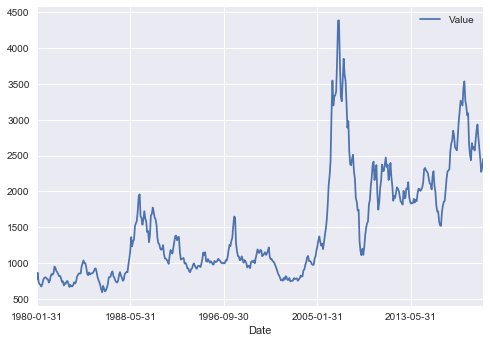

In [35]:
#Salvei no meu computador para não mudar a base de dados
#Zinc.to_csv('ODA_PZINC_USD_2019_11_26.csv')

#Importei em csv a série salva na data de hoje
Zinc=pd.read_csv('ODA_PZINC_USD_2019_11_26.csv', index_col=0)
Zinc.plot()

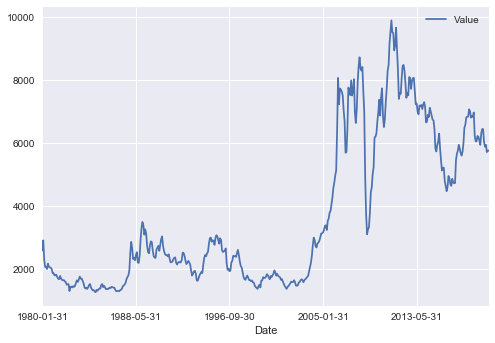

In [36]:
#DESCRIPTION
#Copper; grade A cathode; LME spot price; CIF European ports; US$ per metric ton
#https://www.quandl.com/data/ODA/PCOPP_USD-Copper-grade-A-cathode-LME-spot-price-CIF-European-ports-US-per-metric-ton


#Salvar na variavel Copper a série
#Copper=quandl.get("ODA/PCOPP_USD")

#Salvar em csv a série
#Copper.to_csv('ODA_PCOPP_USD_2019_11_26.csv')

#Importar o arquivo salva em csv
Copper=pd.read_csv('ODA_PCOPP_USD_2019_11_26.csv', index_col=0)
Copper.plot()

In [37]:
#janelar a partir de 2004. Meu critério
Zinc=Zinc['2004':]
Copper=Copper['2004':]



[]

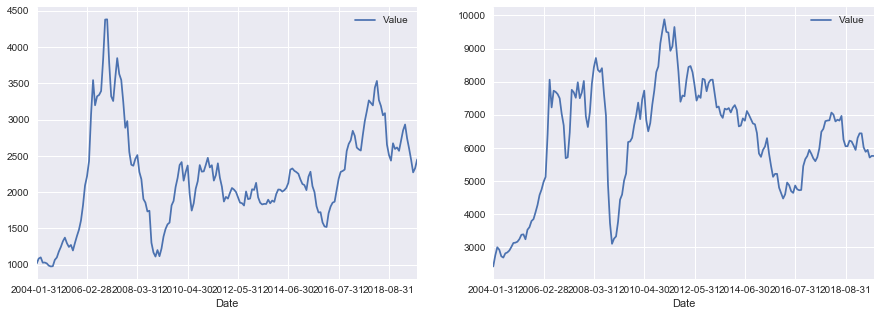

In [38]:
#plot da janela
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,5))
Zinc.plot(ax=ax1)
Copper.plot(ax=ax2)
ax1.legend()
ax2.legend()

plt.plot()

In [39]:
import statsmodels.api as sm

In [40]:
Zinc.pct_change(1)

,Value
Date,
2004-01-31,NaN
2004-02-29,0.068806
2004-03-31,0.014743
2004-04-30,-0.066149
2004-05-31,0.001988
...,...
2019-06-30,-0.051620
2019-07-31,-0.059477
2019-08-31,-0.070917


In [41]:
d=pd.DataFrame(Zinc.Value.pct_change(1))
d.columns=['Zinc']

In [42]:
d['Cooper']=Copper.Value.pct_change(1)
d=sm.add_constant(d)
d=d.dropna()


C:\Users\Mesz\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
d.to_excel('zncop.xls')

C:\Users\Mesz\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '0.9.8' or newer of 'xlsxwriter' (version '0.9.6' currently installed).
  warnings.warn(msg, UserWarning)


PermissionError: [Errno 13] Permission denied: 'zncop.xls'

In [ ]:
d.Cooper.corr(d.Zinc)

In [ ]:
d.Zinc.corr(d.Cooper)

In [44]:
d.head()

,const,Zinc,Cooper
Date,,,
2004-02-29,1.0,0.068806,0.136380
2004-03-31,1.0,0.014743,0.090331
2004-04-30,1.0,-0.066149,-0.024434
2004-05-31,1.0,0.001988,-0.067822
2004-06-30,1.0,-0.011753,-0.014446


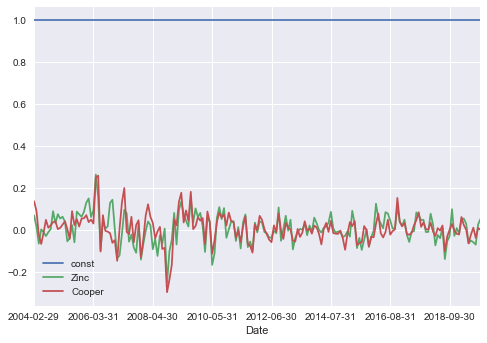

In [45]:
d.plot()

In [46]:
r=sm.OLS(d.Zinc, d[['const', 'Cooper']]).fit()

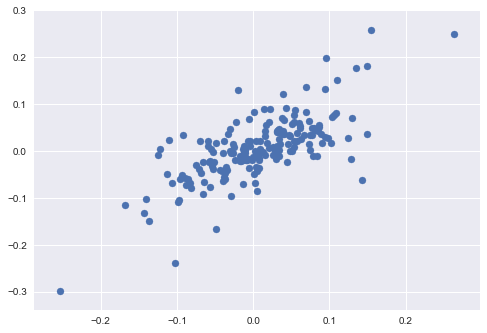

In [47]:
plt.scatter(d.Zinc,d.Cooper)

In [48]:
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                   Zinc   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     208.1
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           3.41e-32
Time:                        12:14:20   Log-Likelihood:                 305.90
No. Observations:                 189   AIC:                            -607.8
Df Residuals:                     187   BIC:                            -601.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.004      0.558      0.5

In [49]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf

In [50]:
#Adfuller - p-valor- com a série completa
adfuller(Zinc.Value)[1]

0.006166987479671494

In [51]:
#Adfuller - pvalor- com a série completa
adfuller(Copper.Value)[1]

0.04686051843084834

In [52]:
#Adfuller - p-valor- com a série a partir de 2004
adfuller(Zinc.Value)[1]

0.006166987479671494

In [53]:
#Adfuller -p-valor- com a série a partir de 2004
adfuller(Copper.Value)[1]

0.04686051843084834

In [54]:
#Conclusões: 
##Com série completa do Zinco, rejeita-se a Hipótese nula com 10% - Rejeita a Hipotese de ser MGB
## Com série a partir de 2004 do Zinco, rejeita-se a Hipotese nula com 1% - Reijeita a Hipotese de ser MGB
### Com a série completa de Cobre, não se rejeita a Hipotese nula - p-valor muito alto - pvalor-62%, não rejeita a H0 de MGB
### Com a série a partir de 2004 do Cobre, rejeita-se a Hipotese nula com 5% de \alpha- rejeita-se a Hipotese de ser MGB

In [55]:
#Função de reversão a média de Schwartz, E. S. (1997) - saida-> parâmetros eta a.a, sigma(%)a.a. e S de equilibrio
def MRM_mes(df):
    
    #Série em Meses. Parametros em ano
    delta_t=1/12
    
    #Calculo do Shift, ln da série e do shift e do retorno 
    df['Value_Shift']=df['Value'].shift(1)
    df['lnSt']= np.log(df['Value'])
    df['lnSt_1']= np.log(df['Value_Shift'])
    df['lnStSt_1']= df['lnSt'] - df['lnSt_1']
    
    #Regresão para obter os parâmetros \beta0 e \beta1
    results=smf.ols('lnStSt_1 ~ lnSt_1', data=df).fit()
    
    #parametro a e b
    a=results.params[0]
    b=results.params[1] +1
    
    #parâmetro eta
    eta= -1*np.log(b)/delta_t
    
    #parametro ero padrão da regressão
    sigma_r=np.std(results.resid)
    
    #sigma do MRM
    sigma=sigma_r*np.sqrt((2*np.log(b))/((np.power(b,2) -1)*delta_t))
    
    #S barra
    S_b=np.exp((a + (np.power(sigma_r,2)/(1+b)))/(1-b))
    
    # S barra linha
    S_b_l=S_b*np.exp((np.power(sigma_r,2))/(2*(np.power(b,2)-1)))
    
    return[eta,sigma,S_b,S_b_l]
    
    

In [56]:
#Série a partir de 2004: Parãmetros eta, sigma (por ano)em % e S de equilíbrio da Série do Zinco
MRM_mes(Zinc)

[0.4284168556635275, 0.2436716835551341, 2557.685097123508, 2470.583007835075]

In [57]:
#Série a partir de 2004: Parãmetros eta, sigma (por ano) em 5 e S de equilíbrio da Série do Cobre
MRM_mes(Copper)

[0.5667510440449598, 0.23983098433299482, 6961.564898122001, 6787.15654554688]

In [12]:
#Série Completa: Parãmetros eta, sigma (por ano)em % e S de equilíbrio da Série do Zinco
MRM_mes(Zinc)

[0.4284168556635275, 0.2436716835551341, 2557.685097123508, 2470.583007835075]

In [13]:
#Série Completa: Parãmetros eta, sigma (por ano) em % e S de equilíbrio da Série do Cobre
MRM_mes(Copper)

[0.5667510440449598, 0.23983098433299482, 6961.564898122001, 6787.15654554688]

In [14]:
#####Simulações dos preços de zinco###
##return[eta,sigma,S_b,S_b_l]####
MRM_mes(Zinc)

[0.4284168556635275, 0.2436716835551341, 2557.685097123508, 2470.583007835075]

In [58]:
def simulacao(P0,eta,alpha,sigma,T,delta_t):
    Po=P0
    serie=[]
    Tempo=[]
    serie.append(Po)
    Tempo.append(0)
    for t in range(int(T/delta_t)):
        P1=np.exp(np.log(P0)*np.exp(-eta*((t+1)*delta_t)) + (alpha- (sigma**2/(2*eta)))*(1-np.exp(-eta*((t+1)*delta_t))))
        serie.append(P1)
        Tempo.append((t+1)*delta_t)
    df=pd.DataFrame(serie)
    
    for i in range(len(Tempo)):
        Tempo[i] == round(i,0) #tries to round all numbers.
        
    df.index=Tempo
    df.columns=['P_Media']
    
    
    for i in range(50):
        Po=P0
        serie=[]
        serie.append(Po)
        for t in range(int(T/delta_t)):
            #P1=Po*np.exp( (eta*(alpha- np.log(Po))-0.5*np.power(sigma,2))*delta_t + sigma*np.random.normal(0,1)*np.sqrt(delta_t))
            P1=np.exp(np.log(Po)*np.exp(-eta*delta_t) + (alpha -1*(sigma**2)/(2*eta))*(1-np.exp(-eta*delta_t))+ sigma*np.random.normal(0,1)*np.sqrt((1-np.exp(-2*eta*delta_t))/(2*eta))    )
            serie.append(P1)
            Po=P1
        df['P_{}'.format(i)]=serie
        
    return[df.plot(legend=False),df.P_Media.plot(color='black', legend=True)]
    
       

In [59]:
P0_zn=Zinc.Value[-1]
delta_t=1/4
eta_zn=MRM_mes(Zinc)[0]
sigma_zn=MRM_mes(Zinc)[1]
alpha_zn=np.log(MRM_mes(Zinc)[2])
T=10
print(P0_zn)
print(alpha_zn)

2451.652173913
7.846857869448733


In [60]:
P0_cu=Copper.Value[-1]
delta_t=1/4
eta_cu=MRM_mes(Copper)[0]
sigma_cu=MRM_mes(Copper)[1]
alpha_cu=np.log(MRM_mes(Copper)[2])
T=10
print(P0_cu)

5757.2978260869995


In [61]:
P0=P0_zn
eta=eta_zn
alpha=alpha_zn
sigma=sigma_zn
T
delta_t
Po=P0
al=np.random.normal(0,1)
print(al)
a=np.exp(np.log(Po)*np.exp(-eta*delta_t) + (alpha -1*(sigma**2)/(2*eta))*(1-np.exp(-eta*delta_t))+ sigma*al*np.sqrt((1-np.exp(-2*eta*delta_t))/(2*eta))    )
print(a)
b=Po*np.exp( (eta*(alpha- np.log(Po))-0.5*np.power(sigma,2))*delta_t + sigma*al*np.sqrt(delta_t))
print(b)

-0.46899455701836607
2315.9306447543427
2308.8155874415734


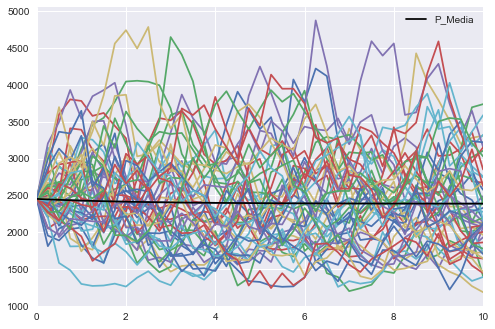

In [62]:
######Simulacao do preço do zinco######
#simulacao(P0,eta,alpha,sigma,T,delta_t):
simulacao(P0_zn,eta_zn,alpha_zn,sigma_zn,T,delta_t)

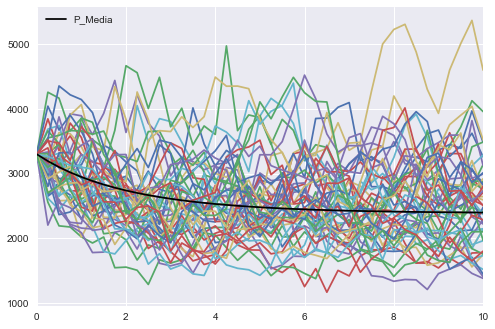

In [63]:
simulacao(3300,eta_zn,alpha_zn,sigma_zn,T,delta_t)

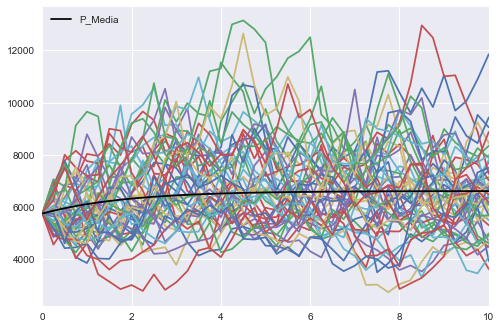

In [64]:
simulacao(P0_cu,eta_cu,alpha_cu,sigma_cu,T,delta_t)

In [65]:
##############################################
######Media de Preços usando MRM geométrico Sw
def media_preco(n,P0,eta,alpha,sigma):
    T=10
    serie=[]
    for t in range(n,T+n,1):
        var= (sigma**2/(2*eta))*(1- np.exp(-2*eta*t))
        P1=np.exp((np.log(P0)*np.exp(-eta*t) + (alpha- (sigma**2/(2*eta)))*(1-np.exp(-eta*t))) ++0.5*var)
        serie.append(P1)
    return[*serie]

In [66]:
media_preco(3,P0_cu,eta_cu,alpha_cu,sigma_cu)

[6611.193351659747,
 6688.143359803485,
 6731.251448254595,
 6755.526587920906,
 6769.239565200869,
 6777.000368446429,
 6781.397280881075,
 6783.889903784693,
 6785.303476608886,
 6786.105278052567]

In [67]:
print((3,P0_cu,eta_cu,alpha_cu,sigma_cu))

(3, 5757.2978260869995, 0.5667510440449598, 8.848159569739558, 0.23983098433299482)


In [68]:
print(alpha_zn)

7.846857869448733


In [69]:
############################################Calculo da taxa de desconto com CAPM##############################

In [70]:
#####Em Damoradam  - janeiro de 2019
###http://pages.stern.nyu.edu/~adamodar/
##Beta de mineração 
beta=1.42
###Risco Pais - Brasil
rp=0.0417

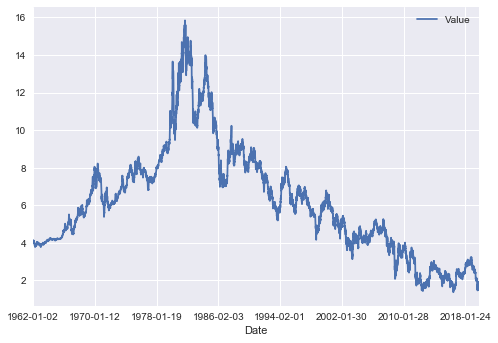

In [71]:
###10-Year Treasury Constant Maturity Rate
##https://www.quandl.com/data/FRED/DGS10-10-Year-Treasury-Constant-Maturity-Rate
#DGS10=quandl.get("FRED/DGS10")
#DGS10.to_csv('FRED_DGS10_2019_11_29.csv')

#Importar o arquivo salva em csv
DGS10=pd.read_csv('FRED_DGS10_2019_11_29.csv', index_col=0)
DGS10.plot()

In [72]:
#Taxa livro de risco americana em bond de dez anos. Média do ano 2019

rf= DGS10['2019':].mean()[0]/100
rf

0.021703964757709242

In [73]:
#Metal index
#https://www.quandl.com/data/ODA/PMETA_INDEX-Base-Metals-Price-Index-2016-100-includes-
#Aluminum-Cobalt-Copper-Iron-Ore-Lead-Molybdenum-Nickel-Tin-Uranium-and-Zinc-Price-Indices
#ODA/PMETA_INDEX

In [74]:
import yfinance as yf

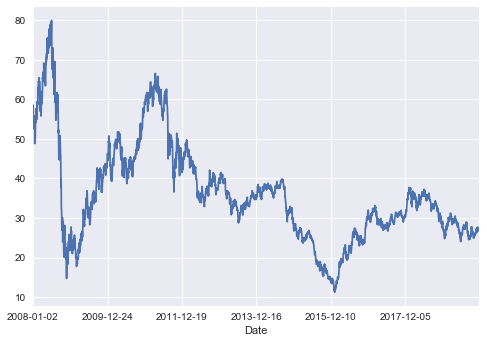

In [75]:
#XME=yf.download("XME", start='2008-01-01', end='2019-11-28')
#XME.to_csv('XME_2019_11_28.csv')

#Importar o arquivo salva em csv
XME=pd.read_csv('XME_2019_11_28.csv', index_col=0)
XME.columns=['Open','High','Low','Close','Adj_Close','Volume']
XME.Adj_Close.plot()

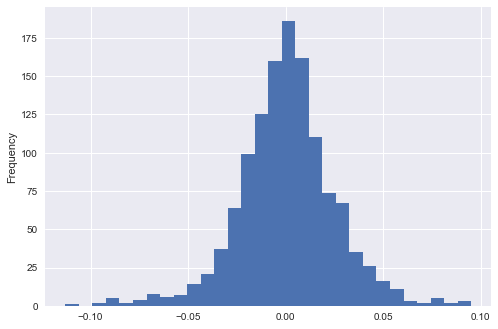

In [76]:
XME['2009':'2014'].Close.pct_change(1).plot.hist(bins=30)

In [77]:
((XME['2009':'2014'].Adj_Close.pct_change(1) +1).product() -1)*100

47.47087730459369

In [78]:
s=[]
for i in range(2015,2020,1):
    k=XME['{}'.format(i) :'{}'.format(i+1)].Close.pct_change(len(XME['{}'.format(i) :'{}'.format(i+1)])-1)[-1]
    print(len(XME['{}'.format(i) :'{}'.format(i+1)]))
    s.append(k)
#plt.plot(s)
df=pd.DataFrame(s)
E_RM=df.mean()[0]
s


252
252
251
251
230


[-0.515711065667843,
 1.0300401052530521,
 0.1698294870821151,
 -0.30530503968043976,
 0.04202629850901163]

In [79]:
E_RM=df.mean()[0]
E_RM

0.08417595709917922

In [80]:
mi=rf+beta*(E_RM-rf)+rp
print(mi)
capm=mi

0.15211419388259662


type(XME1)

In [81]:
print(beta*(E_RM-rf))

0.08871022912488737


In [82]:
XME1=yf.download("XME", start='2006-01-01', end='2019-11-28')


[*********************100%***********************]  1 of 1 completed


In [83]:
print(rf+rp)

0.06340396475770924


In [84]:
j=[]
for i in range(2006,2020,1):
    k=XME1['{}'.format(i)].Close.pct_change(len(XME1['{}'.format(i)])-1)[-1]
    #print(len(XME1['{}'.format(i)]))
    j.append(k)
df1=pd.DataFrame(j)
E_RM_1=df1.mean()[0]
print(E_RM_1*100)


3.871475589204675


In [85]:
#############################################################
#################Variável Técnica############################

In [86]:
#############################################################
###########################C1############################

In [190]:
teor_C1=pd.read_csv('c1_var_tecnica.csv', sep=';')

In [191]:
teor_C1.head()

,Massa,Zn_5_85,Cu_1_59
0,109965.0,0.03964,0.02371
1,84524.0,0.05400,0.01526
2,327184.0,0.05400,0.01526
3,172816.0,0.05828,0.01058
4,120664.0,0.05828,0.01058


In [180]:
teor_C1=pd.read_csv('c1_var_tecnica.csv', sep=';')
teor_C1['teor_Zn_razao']=teor_C1.Massa*teor_C1.Zn_5_85/teor_C1.Massa.sum()
teor_C1['teor_Cu_razao']=teor_C1.Massa*teor_C1.Cu_1_59/teor_C1.Massa.sum()


MEDIA=teor_C1.teor_Zn_razao.sum()*100
Cvar=1.448
VAR=np.power(Cvar*MEDIA,2)
###Modelo 2####
VAR=VAR*(1-0.4)
#######
####Modelo 3####
VAR=VAR*(1-0.4)
VAR=VAR*(1-0.4)

##############

desvio=np.sqrt(np.log(1 + VAR/np.power(MEDIA,2)))
media=np.log(MEDIA) - (desvio**2)/2
#aleatorio=np.random.lognormal(mean=media,sigma=desvio)/100
print(media, desvio**2)

MEDIA_cu_c1=teor_C1.teor_Cu_razao.sum()*100
Cvar_cu_c1=1.357
VAR_cu_c1=np.power(Cvar_cu_c1*MEDIA_cu_c1,2)

###Modelo 2####
VAR_cu_c1=VAR_cu_c1*(1-0.4)
#######
####Modelo 3####
VAR_cu_c1=VAR_cu_c1*(1-0.4)
VAR_cu_c1=VAR_cu_c1*(1-0.4)

##############



desvio_cu_c1=np.sqrt(np.log(1+ VAR_cu_c1/np.power(MEDIA_cu_c1,2)))
media_cu_c1=np.log(MEDIA_cu_c1)- (desvio_cu_c1**2)/2
print(media_cu_c1,desvio_cu_c1**2)


teor_C1['teor_Zn_razao']=teor_C1.teor_Zn_razao/teor_C1.teor_Zn_razao.sum()
teor_C1['teor_Cu_razao']=teor_C1.teor_Cu_razao/teor_C1.teor_Cu_razao.sum()


1.5790046997961624 0.3735533437678596
0.2947048066709183 0.33486593578193447


In [44]:
means = [media, media_cu_c1]  
stds = [desvio,desvio_cu_c1]
corr = 0.74         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs).T

In [45]:
m[0]

0.2280338304272298

In [28]:
r_zn=[]
ale_zn=[]
r_cu=[]
ale_cu=[]
for j in range(1000):
    ###Ajuste do Zinco#############
    means = [media, media_cu_c1]  
    stds = [desvio,desvio_cu_c1]
    corr = 0.74         # correlation
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr],
            [stds[0]*stds[1]*corr,           stds[1]**2]] 
    m = np.random.multivariate_normal(means, covs).T
    aleatorio_zn=np.exp(m[0])/100
    #print(aleatorio_zn)
    diff_zn=(aleatorio_zn- teor_C1.teor_Zn_razao.sum())/len(teor_C1)
    teor_C1['Zn_Controle']=teor_C1.teor_Zn_razao +diff_zn
    i=0
    ale_zn.append(aleatorio_zn)
    while (teor_C1.Zn_Controle <0).sum() >0 and i<100:
        diff_zn=teor_C1.Zn_Controle[teor_C1.Zn_Controle<0].sum()/(teor_C1.Zn_Controle>0).sum()
        teor_C1.Zn_Controle[teor_C1.Zn_Controle<0]=0
        teor_C1.Zn_Controle[teor_C1.Zn_Controle>0]=teor_C1.Zn_Controle[teor_C1.Zn_Controle>0] +diff_zn
        
        i=i+1
    
    #print(i)
    if (teor_C1.Zn_Controle<0).sum() >0:
        r_zn.append(0)
    else:
        r_zn.append(teor_C1.Zn_Controle.sum())
    
    
    #####Ajuste do Cobre###
    aleatorio_cu=np.exp(m[1])/100
    diff_cu=(aleatorio_cu- teor_C1.teor_Cu_razao.sum())/len(teor_C1)
    teor_C1['Cu_Controle']=teor_C1.teor_Cu_razao +diff_cu
    i=0
    ale_cu.append(aleatorio_cu)
    while (teor_C1.Cu_Controle <0).sum() >0 and i<100:
        diff_cu=teor_C1.Cu_Controle[teor_C1.Cu_Controle<0].sum()/(teor_C1.Cu_Controle>0).sum()
        teor_C1.Cu_Controle[teor_C1.Cu_Controle<0]=0
        teor_C1.Cu_Controle[teor_C1.Cu_Controle>0]=teor_C1.Cu_Controle[teor_C1.Cu_Controle>0] +diff_cu
        
        i=i+1
    
    #print(i)
    if (teor_C1.Cu_Controle<0).sum() >0:
        r_cu.append(0)
    else:
        r_cu.append(teor_C1.Cu_Controle.sum())



In [29]:
df2=pd.DataFrame(r_zn)
df2.columns=['Zn_Controle']
df2['Ale_Zn']=ale_zn
df2['Ale_Cu']=ale_cu
df2['Cu_Controle']=r_cu

In [30]:
df2.describe()*100

,Zn_Controle,Ale_Zn,Ale_Cu,Cu_Controle
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.715494,5.715494,1.567002,1.567002
std,7.514767,7.514767,1.767156,1.767156
min,0.099422,0.099422,0.021096,0.021096
25%,1.747351,1.747351,0.475892,0.475892
50%,3.250869,3.250869,1.019300,1.019300
75%,6.788201,6.788201,1.926998,1.926998
max,72.408409,72.408409,20.006714,20.006714


In [ ]:
#############################################################
###########################C3############################

In [90]:
teor_C3=pd.read_csv('c3_var_tecnica.csv', sep=';')

In [181]:
teor_C3=pd.read_csv('c3_var_tecnica.csv', sep=';')
teor_C3['teor_Zn_razao']=teor_C3.Massa*teor_C3.Zn_6_19/teor_C3.Massa.sum()
teor_C3['teor_Cu_razao']=teor_C3.Massa*teor_C3.Cu_1_5_5/teor_C3.Massa.sum()




MEDIA_zn_c3=teor_C3.teor_Zn_razao.sum()*100
Cvar_zn_c3=0.978
VAR_zn_c3=np.power(Cvar_zn_c3*MEDIA_zn_c3,2)
###Modelo 2####
VAR_zn_c3=VAR_zn_c3*(1-0.4)
#######
####Modelo 3####
VAR_zn_c3=VAR_zn_c3*(1-0.4)
VAR_zn_c3=VAR_zn_c3*(1-0.4)

##############



desvio_zn_c3=np.sqrt(np.log(1 + VAR_zn_c3/np.power(MEDIA_zn_c3,2)))
media_zn_c3=np.log(MEDIA_zn_c3) - (desvio_zn_c3**2)/2
print(media_zn_c3, desvio_zn_c3**2)

MEDIA_cu_c3=teor_C3.teor_Cu_razao.sum()*100
Cvar_cu_c3=0.975
VAR_cu_c3=np.power(Cvar_cu_c3*MEDIA_cu_c3,2)

###Modelo 2####
VAR_cu_c3=VAR_cu_c3*(1-0.4)
#######
####Modelo 3####
VAR_cu_c3=VAR_cu_c3*(1-0.4)
VAR_cu_c3=VAR_cu_c3*(1-0.4)

##############




desvio_cu_c3=np.sqrt(np.log(1 + VAR_cu_c3/np.power(MEDIA_cu_c3,2)))
media_cu_c3=np.log(MEDIA_cu_c3) - (desvio_cu_c3**2)/2
print(media_cu_c3, desvio_cu_c3**2)



teor_C3['teor_Zn_razao']=teor_C3.teor_Zn_razao/teor_C3.teor_Zn_razao.sum()
teor_C3['teor_Cu_razao']=teor_C3.teor_Cu_razao/teor_C3.teor_Cu_razao.sum()


1.728229575064018 0.18780693787806105
0.3457702142656356 0.18675753660422723


In [92]:
#############################################################
###########################C4############################

In [93]:
teor_C4=pd.read_csv('c4_var_tecnica.csv', sep=';')

In [182]:
teor_C4=pd.read_csv('c4_var_tecnica.csv', sep=';')

teor_C4['teor_Zn_razao']=teor_C4.Massa*teor_C4.Zn_1_49/teor_C4.Massa.sum()
teor_C4['teor_Cu_razao']=teor_C4.Massa*teor_C4.Cu_0_14/teor_C4.Massa.sum()

MEDIA_zn_c4=teor_C4.teor_Zn_razao.sum()*100
Cvar_zn_c4=1.589
VAR_zn_c4=np.power(Cvar_zn_c4*MEDIA_zn_c4,2)

###Modelo 2####
VAR_zn_c4=VAR_zn_c4*(1-0.4)
#######
####Modelo 3####
VAR_zn_c4=VAR_zn_c4*(1-0.4)
VAR_zn_c4=VAR_zn_c4*(1-0.4)

##############



desvio_zn_c4=np.sqrt(np.log(1 + VAR_zn_c4/np.power(MEDIA_zn_c4,2)))
media_zn_c4=np.log(MEDIA_zn_c4) - (desvio_zn_c4**2)/2
print(media_zn_c4, desvio_zn_c4**2)


MEDIA_cu_c4=teor_C4.teor_Cu_razao.sum()*100
Cvar_cu_c4=1.247



VAR_cu_c4=np.power(Cvar_cu_c4*MEDIA_cu_c4,2)
desvio_cu_c4=np.sqrt(np.log(1 + VAR_cu_c4/np.power(MEDIA_cu_c4,2)))
media_cu_c4=np.log(MEDIA_cu_c4) - (desvio_cu_c4**2)/2

###Modelo 2####
VAR_cu_c4=VAR_cu_c4*(1-0.4)
#######
####Modelo 3####
VAR_cu_c4=VAR_cu_c4*(1-0.4)
VAR_cu_c4=VAR_cu_c4*(1-0.4)

##############




print(media_cu_c4, desvio_cu_c4**2)




teor_C4['teor_Zn_razao']=teor_C4.teor_Zn_razao/teor_C4.teor_Zn_razao.sum()
teor_C4['teor_Cu_razao']=teor_C4.teor_Cu_razao/teor_C4.teor_Cu_razao.sum()


0.17893067808675459 0.4352717346549099
-2.411494211095872 0.9380557461543563


In [49]:
#############################################################
###########################Funcao para simulacao###############

In [225]:
def var(n,teor_c1,media,desvio,media_cu_c1,desvio_cu_c1,corr):
    r_zn=[]
    ale_zn=[]
    r_cu=[]
    ale_cu=[]
    for j in range(n):
        ###Ajuste do Zinco#############
        means = [media, media_cu_c1]  
        stds = [desvio,desvio_cu_c1]
        covs = [[stds[0]**2          , stds[0]*stds[1]*corr],
                [stds[0]*stds[1]*corr,           stds[1]**2]] 
        m = np.random.multivariate_normal(means, covs).T
        aleatorio_zn=np.exp(m[0])/100
    
        diff_zn=(aleatorio_zn- teor_C1.teor_Zn_razao.sum())/len(teor_C1)
        teor_C1['Zn_Controle']=teor_C1.teor_Zn_razao +diff_zn
        i=0
        ale_zn.append(aleatorio_zn)
        while (teor_C1.Zn_Controle <0).sum() >0 and i<100:
            diff_zn=teor_C1.Zn_Controle[teor_C1.Zn_Controle<0].sum()/(teor_C1.Zn_Controle>0).sum()
            teor_C1.Zn_Controle[teor_C1.Zn_Controle<0]=0
            teor_C1.Zn_Controle[teor_C1.Zn_Controle>0]=teor_C1.Zn_Controle[teor_C1.Zn_Controle>0] +diff_zn
            i=i+1
            
        #print(i)
        if (teor_C1.Zn_Controle<0).sum() >0:
            r_zn.append(0)
        else:
            r_zn.append(teor_C1.Zn_Controle.sum())
        
        
        #####Ajuste do Cobre###
        aleatorio_cu=np.exp(m[1])/100
        diff_cu=(aleatorio_cu- teor_C1.teor_Cu_razao.sum())/len(teor_C1)
        teor_C1['Cu_Controle']=teor_C1.teor_Cu_razao +diff_cu
        i=0
        ale_cu.append(aleatorio_cu)
        while (teor_C1.Cu_Controle <0).sum() >0 and i<100:
            diff_cu=teor_C1.Cu_Controle[teor_C1.Cu_Controle<0].sum()/(teor_C1.Cu_Controle>0).sum()
            teor_C1.Cu_Controle[teor_C1.Cu_Controle<0]=0
            teor_C1.Cu_Controle[teor_C1.Cu_Controle>0]=teor_C1.Cu_Controle[teor_C1.Cu_Controle>0] +diff_cu
            i=i+1
            
            #print(i)
        if (teor_C1.Cu_Controle<0).sum() >0:
            r_cu.append(0)
        else:
            r_cu.append(teor_C1.Cu_Controle.sum())
        
        
    df2=pd.DataFrame(r_zn)
    df2.columns=['Zn_Controle']
    df2['Ale_Zn']=ale_zn
    df2['Ale_Cu']=ale_cu
    df2['Cu_Controle']=r_cu
        
    return[df2.describe()*100]


In [39]:
var(10000,teor_C3,media_zn_c3,desvio_zn_c3,media_cu_c3,desvio_cu_c3,0.97)



[          Zn_Controle          Ale_Zn          Ale_Cu     Cu_Controle
 count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
 mean         6.268312        6.268312        1.569113        1.569113
 std          6.280750        6.280750        1.564383        1.564383
 min          0.247306        0.247306        0.073511        0.073511
 25%          2.530781        2.530781        0.634391        0.634391
 50%          4.421359        4.421359        1.117901        1.117901
 75%          7.745942        7.745942        1.948155        1.948155
 max        122.556615      122.556615       28.693389       28.693389]

In [57]:
varteor(10000,teor_C3,media_zn_c3,desvio_zn_c3,media_cu_c3,desvio_cu_c3,0.97)


[          Zn_Controle          Ale_Zn          Ale_Cu     Cu_Controle
 count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
 mean         6.325277        6.325277        1.579876        1.579876
 std          6.272290        6.272290        1.527421        1.527421
 min          0.249003        0.249003        0.050791        0.050791
 25%          2.576087        2.576087        0.647573        0.647573
 50%          4.464229        4.464229        1.120640        1.120640
 75%          7.908365        7.908365        1.966966        1.966966
 max        127.631627      127.631627       25.666182       25.666182]

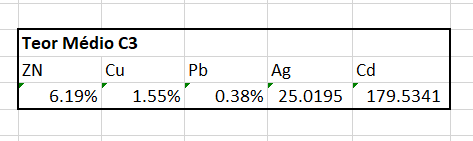

In [43]:
from IPython.display import Image
Image("teor_medio_c3.png")

In [32]:
var(10000,teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74)



[          Zn_Controle          Ale_Zn          Ale_Cu     Cu_Controle
 count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
 mean         5.796065        5.796065        1.599840        1.599840
 std          8.486725        8.486725        2.141197        2.141197
 min          0.037126        0.037126        0.023435        0.023435
 25%          1.623222        1.623222        0.470042        0.470042
 50%          3.357885        3.357885        0.935767        0.935767
 75%          6.819688        6.819688        1.892503        1.892503
 max        199.191414      199.191414       51.752297       51.752297]

In [55]:
varteor(10000,teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74)

[          Zn_Controle          Ale_Zn          Ale_Cu     Cu_Controle
 count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
 mean         5.869790        5.869790        1.573858        1.573858
 std          8.376846        8.376846        2.007172        2.007172
 min          0.076485        0.076485        0.014368        0.014368
 25%          1.630492        1.630492        0.481774        0.481774
 50%          3.390389        3.390389        0.951801        0.951801
 75%          6.738694        6.738694        1.852593        1.852593
 max        171.986513      171.986513       31.063196       31.063196]

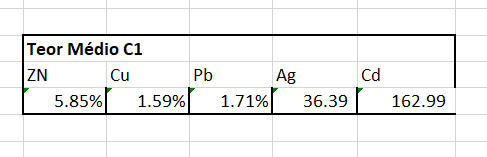

In [44]:
Image("teor_medio_c1.png")

In [40]:
var(10000,teor_C4,media_zn_c4,desvio_zn_c4,media_cu_c4,desvio_cu_c4,0.46)

[          Zn_Controle          Ale_Zn          Ale_Cu     Cu_Controle
 count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
 mean         2.118853        2.118853        0.200468        0.200468
 std          3.354961        3.354961        0.246840        0.246840
 min          0.016573        0.016573        0.003400        0.003400
 25%          0.523284        0.523284        0.065247        0.065247
 50%          1.140676        1.140676        0.125149        0.125149
 75%          2.412626        2.412626        0.240539        0.240539
 max         73.696107       73.696107        4.299453        4.299453]

In [58]:
varteor(10000,teor_C4,media_zn_c4,desvio_zn_c4,media_cu_c4,desvio_cu_c4,0.46)

[          Zn_Controle          Ale_Zn          Ale_Cu     Cu_Controle
 count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
 mean         2.073735        2.073735        0.204953        0.204953
 std          3.121858        3.121858        0.256477        0.256477
 min          0.023976        0.023976        0.004300        0.004300
 25%          0.540004        0.540004        0.066632        0.066632
 50%          1.113120        1.113120        0.128945        0.128945
 75%          2.343522        2.343522        0.246442        0.246442
 max         49.720866       49.720866        4.396855        4.396855]

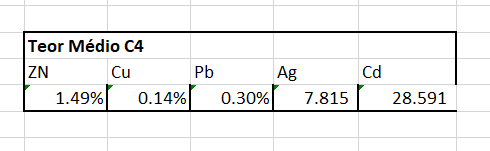

In [45]:
Image("teor_medio_c4.png")

In [95]:
####################Função valor alternativa- mais simples##############
def varteor(n,teor_c1,media,desvio,media_cu_c1,desvio_cu_c1,corr):
    r_zn=[]
    ale_zn=[]
    r_cu=[]
    ale_cu=[]
    for j in range(n):
        ###Ajuste do Zinco#############
        means = [media, media_cu_c1]  
        stds = [desvio,desvio_cu_c1]
        covs = [[stds[0]**2          , stds[0]*stds[1]*corr],
                [stds[0]*stds[1]*corr,           stds[1]**2]] 
        m = np.random.multivariate_normal(means, covs).T
        aleatorio_zn=np.exp(m[0])/100
        teor_C1['Zn_Controle']=teor_C1.teor_Zn_razao*aleatorio_zn
        ale_zn.append(aleatorio_zn)    
        r_zn.append(teor_C1.Zn_Controle.sum())
        
        #####Ajuste do Cobre###
        aleatorio_cu=np.exp(m[1])/100
        teor_C1['Cu_Controle']=teor_C1.teor_Cu_razao*aleatorio_cu
        ale_cu.append(aleatorio_cu)
        r_cu.append(teor_C1.Cu_Controle.sum())
        
        
    df2=pd.DataFrame(r_zn)
    df2.columns=['Zn_Controle']
    df2['Ale_Zn']=ale_zn
    df2['Ale_Cu']=ale_cu
    df2['Cu_Controle']=r_cu
        
    return[df2.describe()*100]


In [49]:
varteor(10000,teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74)

[          Zn_Controle          Ale_Zn          Ale_Cu     Cu_Controle
 count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
 mean         5.805532        5.805532        1.595003        1.595003
 std          8.332629        8.332629        2.106828        2.106828
 min          0.064216        0.064216        0.017888        0.017888
 25%          1.633714        1.633714        0.482541        0.482541
 50%          3.318059        3.318059        0.953177        0.953177
 75%          6.843141        6.843141        1.872735        1.872735
 max        259.207124      259.207124       41.373181       41.373181]

In [192]:
######################################################
###############Fluxo de Caixa ########################
#### Em vezes *1000 de reais########################

In [193]:
FC=pd.read_csv('FC.csv', sep=';', index_col=0)


In [194]:
#media_preco(tempop começar a producao,P0,eta,alpha,sigma):

FC.Preco_Cu=media_preco(3,P0_cu,eta_cu,alpha_cu,sigma_cu)
FC.Preco_Zn=media_preco(3,P0_zn,eta_zn,alpha_zn,sigma_zn)

In [195]:
FC.head(10).T
print(41880/3.3)


12690.909090909092


In [196]:
FC.Depre=FC.Depre/3.3  #conversão para dólares
FC.Custo_Operacao=FC.Custo_Operacao/3.3  #conversao para dolares

In [197]:
FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000

In [198]:
FC['IR']=0.34*(FC.Receita_Liquida -FC.Custo_Operacao -FC.Depre)
FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)

In [199]:
FC.head(10).T

Ano,1,2,3,4,5,6,7,8,9,10
Preco_Zn,2482.483061,2479.821681,2477.231182,2475.180922,2473.691630,2472.656273,2471.954131,2471.484966,2471.174326,2470.969827
Preco_Cu,6611.193352,6688.143360,6731.251448,6755.526588,6769.239565,6777.000368,6781.397281,6783.889904,6785.303477,6786.105278
Producao_Rocha,300000.000000,400000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
Teor_Zn,0.069500,0.086100,0.069300,0.024200,0.055500,0.060000,0.014300,0.013700,0.014500,0.013800
Teor_Cu,0.014400,0.014500,0.020000,0.014300,0.013600,0.013500,0.001500,0.001200,0.001200,0.001600
Custo_Operacao,12690.909091,16921.212121,21151.515152,21151.515152,21151.515152,21151.515152,21151.515152,21151.515152,21151.515152,21151.515152
Depre,4727.272727,4727.272727,4727.272727,4727.272727,4727.272727,4727.272727,4727.272727,4727.272727,4727.272727,4727.272727
Receita_Liquida,50475.791962,78185.958591,95915.747413,48653.760081,71932.018365,75285.339745,14380.137274,13283.710282,13913.022274,14191.655670
IR,11239.587449,19222.741072,23812.566242,7743.490549,15658.098365,16798.227634,-3909.541206,-4282.326383,-4068.360306,-3973.624951
FC_Oper,25535.779583,40478.286225,49033.351071,18785.679179,33683.764481,35829.890164,-3149.439417,-3851.152692,-3448.393018,-3270.067644


In [200]:
0.34*(14191 - 21151-4727)

-3973.5800000000004

In [201]:
#########################Investimento sem a exploracao -  a partir do ano 0####################
#########################################################################
###em *1000 de reais###
Invest=pd.read_csv('Invest.csv', sep=';', index_col=0)
Invest.Investimento_0=Invest.Investimento_0/3.3   ###em dólares
Invest.head
print('$',Invest.Investimento_0.sum()/1000, 'milhões')


$ 70.0 milhões


In [202]:
len(Invest)

11

In [203]:
###Calculo do Investimento em 0###

taxa=capm
I= Invest.iloc[0]
for i in range(len(FC)):
    I= I+ Invest.iloc[i+1]/np.power((1+taxa),i+1)
    #print(i)
Io=I*1000
print(Io)

print('I0 de $', round(Io/(10**6),2),"milhões")


Investimento_0    5.478290e+07
dtype: float64
I0 de $ Investimento_0    54.78
dtype: float64 milhões


In [204]:
round(Invest.transpose(),2)

Ano,0,1,2,3,4,5,6,7,8,9,10
Investimento_0,18787.88,30000.0,0.0,0.0,10606.06,0.0,0.0,10606.06,0.0,0.0,0.0


In [205]:
####################Cálculo do VP em 0####################
taxa=capm
#taxa=0.1
#taxa=0.68
VP=0
for i in range(len(FC)):
    VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i+1)
    #print(i)
VP0=VP*1000
print(VP0)

print('VP0 de $', round(VP0/(10**6),2),"milhões")
VP0_base=VP0

123131601.32542127
VP0 de $ 123.13 milhões


In [206]:
print(rp+rf)

0.06340396475770924


In [207]:
VP0_base/(1+taxa)**3/10**6

80.51613997368257

In [112]:
# Fluxo de caixa livre descontado##
#em t0
print((VP0_base- Io)/10**6)
#hoje t-3
print((VP0_base- Io)/(1+taxa)**3/10**6)

Investimento_0    68.348702
dtype: float64
Investimento_0    44.69343
dtype: float64


In [113]:
######################Calculuo do VP em 1!!!####################
#taxa=0.1
taxa=capm
VP=0
for i in range(1,len(FC),1):
    VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i)
    
VP1=(VP+FC.FC_Oper.iloc[0])*1000
print(VP1)
print(VP1/(1+taxa))

141861665.60251102
123131601.32542129


In [114]:
######################################################

####################TeorZn e Teor Cu##############
def teor(teor,media,desvio,media_1,desvio_1,corr,maximo_zn,maximo_cu):
    ###Ajuste do Zinco#############
    means = [media, media_1]  
    stds = [desvio,desvio_1]
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr],
            [stds[0]*stds[1]*corr,           stds[1]**2]] 
    m = np.random.multivariate_normal(means, covs).T
    aleatorio_zn=min(np.exp(m[0])/100, maximo_zn)
    teor['Zn_Controle']=teor.teor_Zn_razao*aleatorio_zn
        
    #####Ajuste do Cobre###
    aleatorio_cu=min(np.exp(m[1])/100, maximo_cu)
    teor['Cu_Controle']=teor.teor_Cu_razao*aleatorio_cu
    
    
    return[teor.Zn_Controle*teor.Massa.sum()/teor.Massa, teor.Cu_Controle*teor.Massa.sum()/teor.Massa,teor.Massa]


In [115]:
def sim(T,delta_t,P0,eta,alpha,sigma):
    Po=P0
    serie=[]
    serie.append(Po)
    for t in range(int(T/delta_t)):
        P1=np.exp(np.log(Po)*np.exp(-eta*delta_t) + (alpha -1*(sigma**2)/(2*eta))*(1-np.exp(-eta*delta_t))+ sigma*np.random.normal(0,1)*np.sqrt((1-np.exp(-2*eta*delta_t))/(2*eta))    )
        serie.append(P1)
        Po=P1
    return[*serie]

In [116]:
def simmeio(T,delta_t,P0,eta,alpha,sigma):
    ##PAra simulacao do modelos 2,3 - preços em 0.5 ano e em 1 ano, sendo delta_t em 0.5(modelo2) e delta_t em 1(modelo3)
    Po=np.exp(np.log(P0)*np.exp(-eta*((1)*delta_t)) + (alpha- (sigma**2/(2*eta)))*(1-np.exp(-eta*((1)*delta_t))))
    
    ###Para modelo simulação 4 - preço em 2.5 ano (amostra 5)
    #Po=np.exp(np.log(P0)*np.exp(-eta*((5)*delta_t)) + (alpha- (sigma**2/(2*eta)))*(1-np.exp(-eta*((5)*delta_t))))
    
    serie=[]
    serie.append(Po)
    for t in range(int(T/delta_t)):
        P1=np.exp(np.log(Po)*np.exp(-eta*delta_t) + (alpha -1*(sigma**2)/(2*eta))*(1-np.exp(-eta*delta_t))+ sigma*np.random.normal(0,1)*np.sqrt((1-np.exp(-2*eta*delta_t))/(2*eta))    )
        serie.append(P1)
        Po=P1
    return[*serie]

In [117]:
###para o modelo 1####
len(sim(13,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[4:14])

10

In [118]:
###Para o modelo 2
len(list(simmeio(12.5,0.5,P0_zn,eta_zn,alpha_zn,sigma_zn)[i] for i in np.arange(7,26,2)))

10

In [119]:
###Para o modelo 3####
len(simmeio(12,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[3:14])

10

In [120]:
simmeio(10.5,0.5,P0_zn,eta_zn,alpha_zn,sigma_zn)[0:2]

[2438.942195936389, 2313.4527529473257]

In [121]:
###Para o modelo 4#####
len(list(simmeio(10.5,0.5,P0_zn,eta_zn,alpha_zn,sigma_zn)[i] for i in np.arange(1,21,2)))

10

In [123]:
c3_modelo=teor(teor_C3,media_zn_c3,desvio_zn_c3,media_cu_c3,desvio_cu_c3,0.97, 0.256,0.0832)
c1_modelo=teor(teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74,0.256,0.0907)
c4_modelo=teor(teor_C4,media_zn_c4,desvio_zn_c4,media_cu_c4,desvio_cu_c4,0.46,0.236,0.016 )
###Teor ano 1
FC.at[1,'Teor_Zn']=sum(c3_modelo[0][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])
FC.at[1,'Teor_Cu']=sum(c3_modelo[1][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])

##Teor ano2 

FC.at[2,'Teor_Zn']=sum(c3_modelo[0][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])
FC.at[2,'Teor_Cu']=sum(c3_modelo[1][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])

##Teor ano3 

FC.at[3,'Teor_Zn']=sum(c3_modelo[0][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])
FC.at[3,'Teor_Cu']=sum(c3_modelo[1][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])

###Teor ano4
n=sum(c3_modelo[0][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[0][0:3]*c1_modelo[2][0:3])
d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
FC.at[4,'Teor_Zn']=n/d

n=sum(c3_modelo[1][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[1][0:3]*c1_modelo[2][0:3])
d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
FC.at[4,'Teor_Cu']=n/d


###Teor ano5
FC.at[5,'Teor_Zn']=sum(c1_modelo[0][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])
FC.at[5,'Teor_Cu']=sum(c1_modelo[1][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])

###Teor ano6
n=sum(c1_modelo[0][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[0][0:2]*c4_modelo[2][0:2])
d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
FC.at[6,'Teor_Zn']=n/d

n=sum(c1_modelo[1][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[1][0:2]*c4_modelo[2][0:2])
d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
FC.at[6,'Teor_Cu']=n/d


####Teor ano 7
FC.at[7,'Teor_Zn']=sum(c4_modelo[0][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])
FC.at[7,'Teor_Cu']=sum(c4_modelo[1][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])

####Teor ano 8
FC.at[8,'Teor_Zn']=sum(c4_modelo[0][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])
FC.at[8,'Teor_Cu']=sum(c4_modelo[1][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])

####Teor ano 9

FC.at[9,'Teor_Zn']=c4_modelo[0][6]*c4_modelo[2][6]/c4_modelo[2][6]
FC.at[9,'Teor_Cu']=c4_modelo[1][6]*c4_modelo[2][6]/c4_modelo[2][6]


####Teor ano 10

FC.at[10,'Teor_Zn']=sum(c4_modelo[0][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])
FC.at[10,'Teor_Cu']=sum(c4_modelo[1][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])

#################################
###Precos######
FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[4:14]

FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu,sigma_cu)[4:14]



######################################
FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


####################
######################Calculuo do VP em 1!!!####################
taxa=0.1
VP=0
for i in range(1,len(FC),1):
    VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i)
    
VP1=(VP+FC.FC_Oper.iloc[0])*1000
print(VP1)


365245020.14268094


In [62]:
taxa=capm
#taxa=0.1
VP=0
for i in range(len(FC)):
    VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i+1)
    #print(i)
VP0=VP*1000
print(VP0)

print('VP0 de $', round(VP0/(10**6),2),"milhões")

135025837.77291512
VP0 de $ 135.03 milhões


In [77]:
#######Minério para cada ano
tzinco1=[]
tcobre1=[]
tzinco2=[]
tcobre2=[]
tzinco3=[]
tcobre3=[]
tzinco4=[]
tcobre4=[]
tzinco5=[]
tcobre5=[]
tzinco6=[]
tcobre6=[]
tzinco7=[]
tcobre7=[]
tzinco8=[]
tcobre8=[]
tzinco9=[]
tcobre9=[]
tzinco10=[]
tcobre10=[]


for j in range(1000):
    c3_modelo=teor(teor_C3,media_zn_c3,desvio_zn_c3,media_cu_c3,desvio_cu_c3,0.97, 0.256,0.0832)
    c1_modelo=teor(teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74,0.256,0.0907)
    c4_modelo=teor(teor_C4,media_zn_c4,desvio_zn_c4,media_cu_c4,desvio_cu_c4,0.46,0.236,0.016 )
    
    tzinco1.append(100*sum(c3_modelo[0][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3]))
    tcobre1.append(100*sum(c3_modelo[1][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3]))
    
    tzinco2.append(100*sum(c3_modelo[0][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5]))
    tcobre2.append(100*sum(c3_modelo[1][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5]))
    
    tzinco3.append(100*sum(c3_modelo[0][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8]))
    tcobre3.append(100*sum(c3_modelo[1][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8]))
    
    n=sum(c3_modelo[0][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[0][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    tzinco4.append(100*n/d)
    
    n=sum(c3_modelo[1][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[1][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    tcobre4.append(100*n/d)
    
    
    tzinco5.append(100*sum(c1_modelo[0][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4]))
    tcobre5.append(100*sum(c1_modelo[1][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4]))
    
    n=sum(c1_modelo[0][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[0][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    tzinco6.append(100*n/d)
    
    n=sum(c1_modelo[1][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[1][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    tcobre6.append(100*n/d)
    
    tzinco7.append(100*sum(c4_modelo[0][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4]))
    tcobre7.append(100*sum(c4_modelo[1][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4]))
    
    
    tzinco8.append(100*sum(c4_modelo[0][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6]))
    tcobre8.append(100*sum(c4_modelo[1][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6]))
    
    
    tzinco9.append(100*c4_modelo[0][6]*c4_modelo[2][6]/c4_modelo[2][6])
    tcobre9.append(100*c4_modelo[1][6]*c4_modelo[2][6]/c4_modelo[2][6])
    
    
    tzinco10.append(100*sum(c4_modelo[0][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9]))
    tcobre10.append(100*sum(c4_modelo[1][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9]))
    
    
medidas=[[np.mean(tzinco1),np.mean(tzinco2),np.mean(tzinco3),np.mean(tzinco4),
        np.mean(tzinco5),np.mean(tzinco6),np.mean(tzinco7),np.mean(tzinco8),np.mean(tzinco9),np.mean(tzinco10)], 
       
       [np.mean(tcobre1),np.mean(tcobre2),np.mean(tcobre3),np.mean(tcobre4),
        np.mean(tcobre5),np.mean(tcobre6),np.mean(tcobre7),np.mean(tcobre8),np.mean(tcobre9),np.mean(tcobre10)], 
       
         [np.std(tzinco1),np.std(tzinco2),np.std(tzinco3),np.std(tzinco4),
        np.std(tzinco5),np.std(tzinco6),np.std(tzinco7),np.std(tzinco8),np.std(tzinco9),np.std(tzinco10)], 
       
       [np.std(tcobre1),np.std(tcobre2),np.std(tcobre3),np.std(tcobre4),
        np.std(tcobre5),np.std(tcobre6),np.std(tcobre7),np.std(tcobre8),np.std(tcobre9),np.std(tcobre10)], 
       
        
        
        
        ]

tzinco1=[]
tcobre1=[]
tzinco2=[]
tcobre2=[]
tzinco3=[]
tcobre3=[]
tzinco4=[]
tcobre4=[]
tzinco5=[]
tcobre5=[]
tzinco6=[]
tcobre6=[]
tzinco7=[]
tcobre7=[]
tzinco8=[]
tcobre8=[]
tzinco9=[]
tcobre9=[]
tzinco10=[]
tcobre10=[]

In [107]:
data3=pd.DataFrame(medidas)
data3.index=['Media_3_zinc','Media_cobre','Std_zinco', 'Std_Cobre']
data3=data3.T
data3.head()

data3['SAGA_ZN']=[6.952755333,8.614647161,6.925921556,2.419297497,5.547740461,5.998704767,1.434816587,1.367421859,1.45293593,1.37565275
]
data3.head()

,Media_3_zinc,Media_cobre,Std_zinco,Std_Cobre,SAGA_ZN
0,6.869606,1.421895,3.084345,0.635572,6.952755
1,8.509808,1.427556,3.820769,0.638102,8.614647
2,6.844570,1.967204,3.073104,0.879319,6.925922
3,3.570614,1.465611,2.080163,0.678859,2.419297
4,5.506701,1.369739,3.571995,0.837237,5.547740


,Media_2_zinco,Media_cobre,Std_zinco,Std_Cobre,SAGA_ZN
0,6.792140,1.444076,5.062075,1.118624,6.952755
1,8.413846,1.449825,6.270707,1.123077,8.614647
2,6.767387,1.997892,5.043627,1.547625,6.925922
3,3.530850,1.447333,2.908363,1.044596,2.419297
4,5.445469,1.338883,5.012335,1.269002,5.547740


In [108]:
data=pd.DataFrame(medidas)
data.index=['Media_1_zinc','Media_cobre','Std_zinco', 'Std_Cobre']
data=data.T
data.head()

data['SAGA_ZN']=[6.952755333,8.614647161,6.925921556,2.419297497,5.547740461,5.998704767,1.434816587,1.367421859,1.45293593,1.37565275
]
data.head()

,Media_1_zinc,Media_cobre,Std_zinco,Std_Cobre,SAGA_ZN
0,6.869606,1.421895,3.084345,0.635572,6.952755
1,8.509808,1.427556,3.820769,0.638102,8.614647
2,6.844570,1.967204,3.073104,0.879319,6.925922
3,3.570614,1.465611,2.080163,0.678859,2.419297
4,5.506701,1.369739,3.571995,0.837237,5.547740


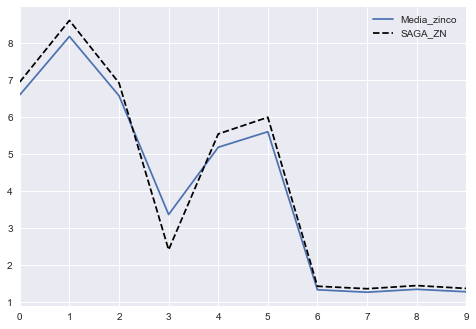

In [41]:
data[['Media_zinco']].plot()
data.SAGA_ZN.plot(color='black', style='--', legend='TRUE')

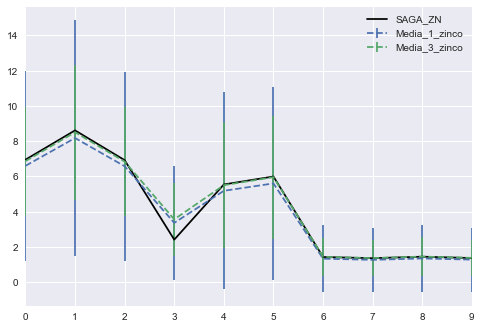

In [79]:
plt.errorbar(data.index,data.Media_1_zinco, yerr=data.Std_zinco, ls='--')
plt.errorbar(data3.index,data3.Media_3_zinco, yerr=data3.Std_zinco, ls='--')

data.SAGA_ZN.plot(color='black', legend='TRUE')
plt.legend()

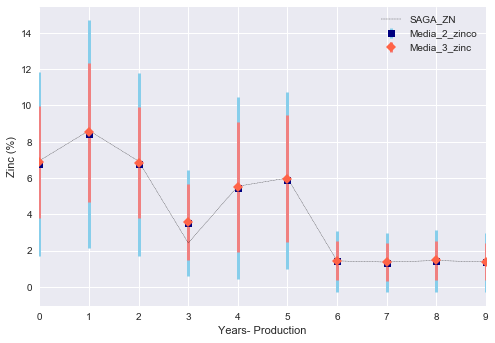

In [114]:
plt.errorbar(data.index,data2.Media_2_zinco, yerr=data2.Std_zinco, fmt='s', color='navy',
             ecolor='skyblue', elinewidth=3, capsize=0);
plt.errorbar(data.index,data3.Media_3_zinc, yerr=data3.Std_zinco, fmt='D', color='tomato',
             ecolor='lightcoral', elinewidth=3, capsize=0);
data.SAGA_ZN.plot(color='black', style='--', linewidth=.3, legend='TRUE')
plt.legend()
plt.xlabel('Years- Production')
plt.ylabel('Zinc (%)')

In [128]:
#####lambda Kappa - primeiro do Zinco, depois do cobre
#lambka=np.array([0.193173086146951,0.12912641876307])
#lambka=np.array([0.223051769098707,0.0869787538964746])
#lambka=np.array([0.16617169251358,0.169745998074254])
#lambka=np.array([0.166237680036838,0.169643591565253])   #bom
lambka=np.array([0.167967425854592,0.166964845518922])   #bom 122.5
#lambka=np.array([0.16878683776647,0.165699667834461])


In [129]:
lambka[1]

0.166964845518922

In [130]:
alpha_cu - lambka[1] 

8.681194724220635

In [131]:
###########################Só com preço!!!
#####################Simulacao de monte carlo####
mc_vp1=[]
mc_vp0=[]
for i in range(10000):
    
    #################################
    ###Precos######
    #FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[4:14]
    FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn -lambka[0],sigma_zn)[4:14]


    #FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu,sigma_cu)[4:14]
    FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu-lambka[1],sigma_cu)[4:14]




    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


    ####################
    ######################Calculuo do VP em 1!!!####################
    #taxa=capm
    taxa=rp+rf
    VP=0
    for i in range(1,len(FC),1):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i)
    
    VP1=(VP+FC.FC_Oper.iloc[0])*1000
    mc_vp1.append(VP1)
    mc_vp0.append(VP1/(1+taxa))
  


In [132]:
mc_df_p=pd.DataFrame(mc_vp1)
mc_df_p.columns=['VP1']
mc_df_p['VP0']=mc_vp0

In [133]:
mc_df_p.describe()/1000000

,VP1,VP0
count,0.010000,0.010000
mean,130.053722,122.299452
std,26.812312,25.213666
min,30.765120,28.930793
25%,111.630395,104.974590
50%,128.051109,120.416242
75%,146.317820,137.593826
max,264.218464,248.464810


In [134]:
#####Exportei e importei a simulacao de MC - aqui só com preços###################
###########################################################################################
#mc_df_p.to_csv('modelo_1_price_only.csv')
mc_df_p=pd.read_csv('modelo_1_price_only.csv',  index_col=0)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   3.,
          1.,   0.,   2.,   0.,   1.,   5.,   2.,   2.,   3.,   5.,   6.,
         11.,  13.,  15.,  15.,  15.,  10.,  17.,  21.,  26.,  28.,  24.,
         25.,  29.,  37.,  40.,  65.,  55.,  51.,  60.,  79.,  79.,  77.,
         91.,  74.,  84.,  94., 144., 115., 137., 112., 124., 121., 117.,
        138., 126., 155., 185., 158., 160., 175., 162., 183., 178., 178.,
        186., 202., 176., 174., 175., 200., 171., 161., 160., 160., 173.,
        174., 194., 146., 162., 156., 153., 158., 169., 135., 143., 137.,
        125., 128., 104., 124., 106., 110.,  84., 100.,  89.,  83., 101.,
         82.,  54.,  64.,  76.,  64.,  73.,  47.,  45.,  53.,  52.,  48.,
         33.,  44.,  35.,  37.,  42.,  38.,  36.,  34.,  21.,  32.,  23.,
         19.,  19.,  11.,  28.,  20.,  17.,  15.,  13.,  18.,   9.,  10.,
          5.,  11.,  10.,   9.,  13., 

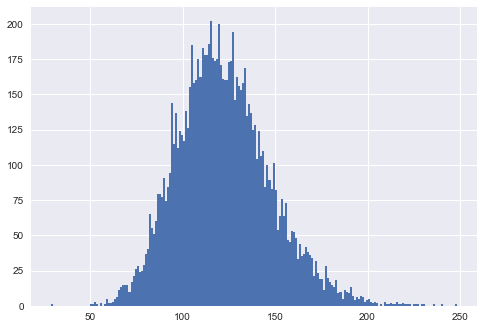

In [135]:
plt.hist(mc_df_p.VP0/1000000, bins=200)

In [136]:
print("A probabilidade do Valor Presente ser menor que 0 é de",100*(mc_df_p.VP0/(10**6)<0).sum()/10000 ,"%")
print("A probabilidade do Valor Presente ser menor que o Investimento ($ 54 milhoes) é de",100*(mc_df_p.VP0/(10**6)<54).sum()/10000 ,"%")

A probabilidade do Valor Presente ser menor que 0 é de 0.0 %
A probabilidade do Valor Presente ser menor que o Investimento ($ 54 milhoes) é de 0.07 %


In [137]:
import seaborn as sns

In [138]:
mc_df_p['ni']=np.log(mc_df_p.VP1/VP0_base)
mc_df_p.ni.mean()+(mc_df_p.ni.std()**2)/2

0.054999154137025025

In [139]:
100*mc_df_p.describe()

,VP1,VP0,ni
count,1.000000e+06,1.000000e+06,1000000.000000
mean,1.300537e+10,1.222995e+10,3.336032
std,2.681231e+09,2.521367e+09,20.803285
min,3.076512e+09,2.893079e+09,-138.687214
25%,1.116304e+10,1.049746e+10,-9.806034
50%,1.280511e+10,1.204162e+10,3.917576
75%,1.463178e+10,1.375938e+10,17.252740
max,2.642185e+10,2.484648e+10,76.352256


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,
          1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   3.,
          3.,   0.,   2.,   2.,   1.,   1.,   3.,   3.,   4.,   7.,   6.,
          9.,   8.,  10.,  10.,  11.,  10.,   8.,   5.,  15.,  16.,  13.,
         23.,  22.,  15.,  22.,  19.,  23.,  31.,  28.,  44.,  47.,  47.,
         45.,  50.,  55.,  74.,  62.,  73.,  77.,  69.,  77.,  75., 126.,
        112., 124., 110., 124., 105., 126., 123., 133., 144., 161., 196.,
        165., 169., 180., 184., 196., 203., 205., 225., 211., 182., 222.,
        219., 194., 192., 194., 218., 238., 192., 192., 210., 197., 218.,
        174., 193., 163., 164., 166., 

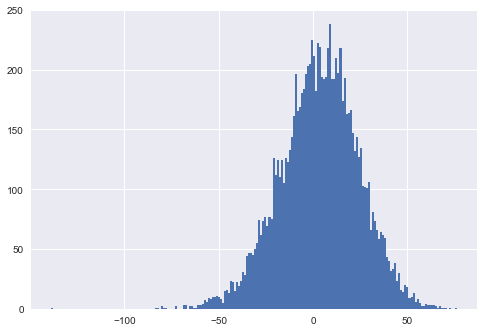

In [140]:
plt.hist(100*mc_df_p.ni, bins=200)

In [60]:
###########################################################
############# Freitas Brandao#######

In [61]:
###########################Só com preço!!! COM OS DOIS VARIANDO -CAPM 
#####################Simulacao de monte carlo####
np.random.seed(2020)
vp0_freitas=[]
for i in range(10000):
    
    #################################
    ###Precos######
    FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[4:14]

    FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu,sigma_cu)[4:14]



    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


    ####################
    ######################Calculuo do VP em 1!!!####################
    taxa=capm
    VP=0
    for i in range(len(FC)):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i+1)
    
    VP=VP*1000
    vp0_freitas.append(VP)
  




In [62]:
freitas_df=pd.DataFrame(vp0_freitas)
freitas_df.columns=['VP0']
media_freitas=freitas_df.mean().values
freitas_df.describe()/10**6


,VP0
count,0.010000
mean,123.511308
std,22.553276
min,53.693195
25%,107.812989
50%,121.704962
75%,137.316038
max,276.516997


In [357]:
###########################Só com preço!!! COM OS DOIS VARIANDO -COM TAXA LIVRE DE RISCO E PREMIO DE MERCADO
#####################Simulacao de monte carlo####
np.random.seed(2020)
vp0_freitas_ro=[]
for i in range(10000):
    
    #################################
    ###Precos######
    FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn-res.x[0],sigma_zn)[4:14]

    FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu -res.x[1],sigma_cu)[4:14]



    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


    ####################
    ######################Calculuo do VP em 0!!! com taxa rf+rp####################
    taxa=rf+rp
    VP=0
    for i in range(len(FC)):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i+1)
    
    VP=VP*1000
    vp0_freitas_ro.append(VP)
  




In [359]:
np.mean(vp0_freitas_ro)

-81748666.62363127

In [63]:
###########################Só com preço!!! COM OS Variação dos dois
#####################Simulacao de monte carlo####
def freita_zn(div):
    np.random.seed(2020)
    vp0_fr_zn=[]
    for i in range(10000):
        #################################
        ###Precos######
        FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn-div[0],sigma_zn)[4:14]
        FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu-div[1],sigma_cu)[4:14]
        #FC.Preco_Zn=media_preco(3,P0_zn,eta_zn,alpha_zn -div,sigma_zn)
        #FC.Preco_Cu=media_preco(3,P0_cu,eta_cu,alpha_cu,sigma_cu)
        
        ######################################
        FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
        FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
        FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)

        ####################
        #####################Calculuo do VP em 1!!!####################
        taxa=rf+rp
        VP=0
        for i in range(len(FC)):
            VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i+1)
        VP=VP*1000
        vp0_fr_zn.append(VP)
    return (np.mean(vp0_fr_zn) - media_freitas)
  




In [346]:
###########################Só com preço!!! COM OS Variação do ZINCO -    cobre constante
#####################Simulacao de monte carlo####
def freita_for(div):
    #np.random.seed(2020)
    vp0_fr_zn=[]
    #for i in range(1000):
    #################################
    ##Precos######
    #FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn-div[0],sigma_zn)[4:14]
    #FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu-div[1],sigma_cu)[4:14]
    FC.Preco_Zn=media_preco(3,P0_zn,eta_zn,alpha_zn -div,sigma_zn)
    FC.Preco_Cu=media_preco(3,P0_cu,eta_cu,alpha_cu,sigma_cu)
        
    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)

    ####################
    #####################Calculuo do VP em 1!!!####################
    taxa=rf+rp
    VP=0
    for i in range(len(FC)):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i+1)
        VP=VP*1000
        
    return (VP - media_freitas)
  




In [173]:
#freita_zn(capm-rf-rp)[0]/10**6

121.43467427643183

In [64]:
media_freitas

array([1.23511308e+08])

In [348]:
#res=minimize(freita_for,0.01, method='nelder-mead',options={'xatol': 1e-3, 'disp': True})

Optimization terminated successfully.
         Current function value: 3904184556390653459868661468626944.000000
         Iterations: 33
         Function evaluations: 81


In [349]:
#res.x

array([65.5455])

In [68]:
from scipy.optimize import minimize

In [69]:
xo=np.array([0.04,0.05])

In [70]:
xo[0]

0.04

In [171]:
#res=minimize(freita_zn,xo, method='nelder-mead',options={'xatol': 1e-3, 'disp': True})

In [172]:
#res.x

In [ ]:
##############################

In [141]:
#####Modelo 1####
#####################Simulacao de monte carlo####
mc_vp1=[]
mc_vp0=[]
for i in range(10000):
    c3_modelo=teor(teor_C3,media_zn_c3,desvio_zn_c3,media_cu_c3,desvio_cu_c3,0.97, 0.256,0.0832)
    c1_modelo=teor(teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74,0.256,0.0907)
    c4_modelo=teor(teor_C4,media_zn_c4,desvio_zn_c4,media_cu_c4,desvio_cu_c4,0.46,0.236,0.016)
    
    ###Teor ano 1
    FC.at[1,'Teor_Zn']=sum(c3_modelo[0][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])
    FC.at[1,'Teor_Cu']=sum(c3_modelo[1][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])

    ##Teor ano2 

    FC.at[2,'Teor_Zn']=sum(c3_modelo[0][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])
    FC.at[2,'Teor_Cu']=sum(c3_modelo[1][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])

    ##Teor ano3 

    FC.at[3,'Teor_Zn']=sum(c3_modelo[0][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])
    FC.at[3,'Teor_Cu']=sum(c3_modelo[1][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])

    ###Teor ano4
    n=sum(c3_modelo[0][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[0][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    FC.at[4,'Teor_Zn']=n/d

    n=sum(c3_modelo[1][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[1][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    FC.at[4,'Teor_Cu']=n/d


    ###Teor ano5
    FC.at[5,'Teor_Zn']=sum(c1_modelo[0][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])
    FC.at[5,'Teor_Cu']=sum(c1_modelo[1][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])

    ###Teor ano6
    n=sum(c1_modelo[0][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[0][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    FC.at[6,'Teor_Zn']=n/d

    n=sum(c1_modelo[1][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[1][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    FC.at[6,'Teor_Cu']=n/d


    ####Teor ano 7
    FC.at[7,'Teor_Zn']=sum(c4_modelo[0][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])
    FC.at[7,'Teor_Cu']=sum(c4_modelo[1][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])

    ####Teor ano 8
    FC.at[8,'Teor_Zn']=sum(c4_modelo[0][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])
    FC.at[8,'Teor_Cu']=sum(c4_modelo[1][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])

    ####Teor ano 9

    FC.at[9,'Teor_Zn']=c4_modelo[0][6]*c4_modelo[2][6]/c4_modelo[2][6]
    FC.at[9,'Teor_Cu']=c4_modelo[1][6]*c4_modelo[2][6]/c4_modelo[2][6]


    ####Teor ano 10

    FC.at[10,'Teor_Zn']=sum(c4_modelo[0][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])
    FC.at[10,'Teor_Cu']=sum(c4_modelo[1][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])

    #################################
    ###Precos######
    #FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[4:14]

    FC.Preco_Zn=sim(13,1,P0_zn,eta_zn,alpha_zn- lambka[0],sigma_zn)[4:14]

    #FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu,sigma_cu)[4:14]

    FC.Preco_Cu=sim(13,1,P0_cu,eta_cu,alpha_cu-lambka[1],sigma_cu)[4:14]



    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


    ####################
    ######################Calculuo do VP em 1!!!####################
    #taxa=capm
    taxa=rp+rf
    VP=0
    for i in range(1,len(FC),1):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i)
    
    VP1=(VP+FC.FC_Oper.iloc[0])*1000
    mc_vp1.append(VP1)
    mc_vp0.append(VP1/(1+taxa))
  


In [142]:
taxa

0.06340396475770924

In [143]:
mc_df=pd.DataFrame(mc_vp1)
mc_df.columns=['VP1']
mc_df['VP0']=mc_vp0

In [144]:
mc_df.describe()/1000000

,VP1,VP0
count,0.010000,0.010000
mean,126.521295,118.977641
std,130.408657,122.633224
min,-72.716192,-68.380592
25%,33.407545,31.415667
50%,93.020170,87.473973
75%,183.764149,172.807470
max,880.780307,828.265020


In [145]:
mc_df.to_csv('modelo_1.csv')

In [153]:
#####Exportei e importei a simulacao de MC - Modelo 1 ###################
###########################################################################################
#mc_df.to_csv('modelo_1.csv')
mc_df=pd.read_csv('modelo_1.csv',  index_col=0)

(array([  1.,   3.,   2.,   9.,  13.,  26.,  37.,  63.,  85.,  80., 113.,
        138., 126., 174., 183., 181., 200., 179., 213., 203., 215., 207.,
        214., 222., 216., 216., 187., 193., 213., 187., 218., 205., 192.,
        164., 160., 183., 162., 163., 161., 157., 136., 136., 124., 151.,
        126., 123., 127., 116., 113., 117.,  89., 105.,  92., 102.,  84.,
         75.,  96.,  83.,  62.,  76.,  78.,  53.,  77.,  61.,  61.,  68.,
         67.,  63.,  45.,  50.,  49.,  60.,  42.,  38.,  48.,  36.,  48.,
         41.,  39.,  33.,  33.,  32.,  28.,  24.,  32.,  31.,  25.,  28.,
         18.,  29.,  32.,  26.,  18.,  25.,  19.,  26.,  28.,  17.,  12.,
         14.,  13.,  18.,  12.,  19.,   7.,  15.,  18.,  14.,   8.,  14.,
         15.,   9.,  13.,  15.,  12.,  13.,   9.,  14.,   8.,   8.,  11.,
          9.,   6.,   9.,   5.,   4.,   9.,  11.,   6.,   4.,  12.,   7.,
          2.,   7.,   0.,   6.,   5.,   2.,   3.,   4.,   6.,   4.,   0.,
          2.,   1.,   5.,   3.,   7., 

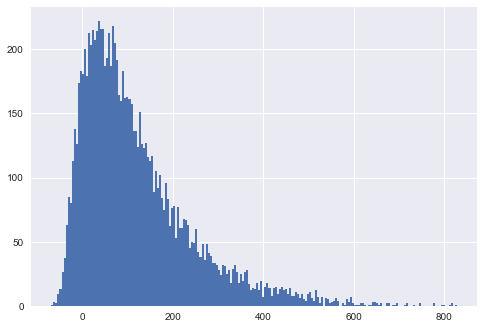

In [154]:
plt.hist(mc_df.VP0/1000000, bins=200)

In [162]:
print("A probabilidade do Valor Presente ser menor que 0 é de",100*(mc_df.VP0/(10**6)<0).sum()/10000 ,"%")
print("A probabilidade do Valor Presente ser menor que o Investimento ($ 54 milhoes) é de",100*(mc_df.VP0/(10**6)<54).sum()/10000 ,"%")

A probabilidade do Valor Presente ser menor que 0 é de 10.95 %
A probabilidade do Valor Presente ser menor que o Investimento ($ 54 milhoes) é de 35.53 %


In [163]:
mc_df['ni']=np.log(mc_df.VP1/VP0_base)
mc_df['ni2']=(mc_df.VP1/VP0_base)  -1

#mc_df['ni2'][mc_df.VP1>0]=(mc_df.VP1-VP0_base)/VP0_base
#mc_df['ni2'][mc_df.VP1<0]=-(mc_df.VP1-VP0_base)/VP0_base

C:\Users\Mesz\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [164]:
100*mc_df.describe()

,VP1,VP0,ni,ni2
count,1.000000e+06,1.000000e+06,890500.000000,1000000.000000
mean,1.265213e+10,1.189776e+10,-30.432592,2.752903
std,1.304087e+10,1.226332e+10,114.317769,105.909982
min,-7.271619e+09,-6.838059e+09,-1055.331814,-159.055670
25%,3.340755e+09,3.141567e+09,-87.635227,-72.868423
50%,9.302017e+09,8.747397e+09,-12.667191,-24.454674
75%,1.837641e+10,1.728075e+10,47.995315,49.242069
max,8.807803e+10,8.282650e+10,196.755451,615.316212


In [165]:
print(mc_df.ni.mean()+(mc_df.ni.std()**2)/2)
#print(0.16051054420779895)

0.34910168874252867


In [166]:
VP0_base

123131601.32542127

In [167]:
print(mc_df.ni2.mean()+(mc_df.ni2.std()**2)/2)


0.5883752467654946


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,
          4.,   0.,   2.,   0.,   2.,   3.,   3.,   2.,   0.,   3.,   3.,
          0.,   3.,   0.,   3.,   0.,   1.,   2.,   5.,   2.,   5.,   4.,
          5.,   3.,   2.,   8.,   8.,   4.,   6.,   9.,   6.,   7.,   7.,
          9.,   3.,  13.,  12.,  13.,   9.,  12.,  14.,   9.,  17.,  22.,
         18.,  11.,  21.,  15.,  30.,  21.,  19.,  25.,  15.,  24.,  31.,
         35.,  50.,  37.,  54.,  30.,  46.,  51.,  63.,  56.,  49.,  66.,
         76.,  74.,  83.,  93.,  82., 

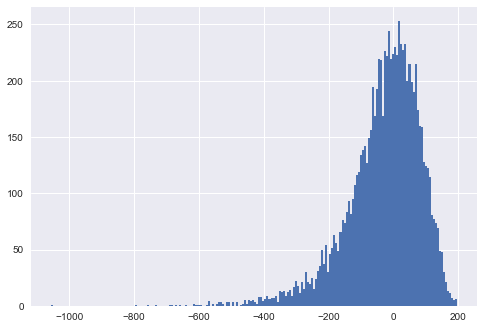

In [168]:
plt.hist(100*mc_df.ni.dropna(), bins=200)

In [169]:
##############################################################
################Modelo 2######################################
#####################Simulacao de monte carlo####
mc_vp1=[]
mc_vp0=[]
for i in range(10000):
    c3_modelo=teor(teor_C3,media_zn_c3,desvio_zn_c3,media_cu_c3,desvio_cu_c3,0.97, 0.256,0.0832)
    c1_modelo=teor(teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74,0.256,0.0907)
    c4_modelo=teor(teor_C4,media_zn_c4,desvio_zn_c4,media_cu_c4,desvio_cu_c4,0.46,0.236,0.016)
    
    
    ###Teor ano 1
    FC.at[1,'Teor_Zn']=sum(c3_modelo[0][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])
    FC.at[1,'Teor_Cu']=sum(c3_modelo[1][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])

    ##Teor ano2 

    FC.at[2,'Teor_Zn']=sum(c3_modelo[0][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])
    FC.at[2,'Teor_Cu']=sum(c3_modelo[1][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])

    ##Teor ano3 

    FC.at[3,'Teor_Zn']=sum(c3_modelo[0][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])
    FC.at[3,'Teor_Cu']=sum(c3_modelo[1][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])

    ###Teor ano4
    n=sum(c3_modelo[0][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[0][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    FC.at[4,'Teor_Zn']=n/d

    n=sum(c3_modelo[1][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[1][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    FC.at[4,'Teor_Cu']=n/d


    ###Teor ano5
    FC.at[5,'Teor_Zn']=sum(c1_modelo[0][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])
    FC.at[5,'Teor_Cu']=sum(c1_modelo[1][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])

    ###Teor ano6
    n=sum(c1_modelo[0][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[0][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    FC.at[6,'Teor_Zn']=n/d

    n=sum(c1_modelo[1][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[1][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    FC.at[6,'Teor_Cu']=n/d


    ####Teor ano 7
    FC.at[7,'Teor_Zn']=sum(c4_modelo[0][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])
    FC.at[7,'Teor_Cu']=sum(c4_modelo[1][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])

    ####Teor ano 8
    FC.at[8,'Teor_Zn']=sum(c4_modelo[0][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])
    FC.at[8,'Teor_Cu']=sum(c4_modelo[1][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])

    ####Teor ano 9

    FC.at[9,'Teor_Zn']=c4_modelo[0][6]*c4_modelo[2][6]/c4_modelo[2][6]
    FC.at[9,'Teor_Cu']=c4_modelo[1][6]*c4_modelo[2][6]/c4_modelo[2][6]


    ####Teor ano 10

    FC.at[10,'Teor_Zn']=sum(c4_modelo[0][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])
    FC.at[10,'Teor_Cu']=sum(c4_modelo[1][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])

    #################################
    ###Precos######
    #len(list(simmeio(12.5,0.5,P0_zn,eta_zn,alpha_zn,sigma_zn)[i] for i in np.arange(7,26,2)))
    #FC.Preco_Zn=list(simmeio(12.5,0.5,P0_zn,eta_zn,alpha_zn,sigma_zn)[i] for i in np.arange(7,26,2))
    FC.Preco_Zn=list(simmeio(12.5,0.5,P0_zn,eta_zn,alpha_zn- lambka[0],sigma_zn)[i] for i in np.arange(7,26,2))



    #FC.Preco_Cu=list(simmeio(12.5,0.5,P0_cu,eta_cu,alpha_cu,sigma_cu)[i] for i in np.arange(7,26,2))
    FC.Preco_Cu=list(simmeio(12.5,0.5,P0_cu,eta_cu,alpha_cu-lambka[1],sigma_cu)[i] for i in np.arange(7,26,2))



    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


    ####################
    ######################Calculuo do VP em 1!!!####################
    #taxa=capm
    taxa=rp+rf
    VP=0
    for i in range(1,len(FC),1):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i)
    
    VP1=(VP+FC.FC_Oper.iloc[0])*1000
    mc_vp1.append(VP1)
    mc_vp0.append(VP1/(1+taxa))
  





In [170]:
print(taxa)

0.06340396475770924


In [171]:
mc2_df=pd.DataFrame(mc_vp1)
mc2_df.columns=['VP1']
mc2_df['VP0']=mc_vp0

In [172]:
#####Exportei e importei a simulacao de MC - Modelo 2 ###################
###########################################################################################
mc2_df.to_csv('modelo_2.csv')
#mc2_df=pd.read_csv('modelo_2.csv',  index_col=0)

In [173]:
mc2_df=pd.read_csv('modelo_2.csv',  index_col=0)

(array([  3.,   5.,   4.,  15.,  23.,  29.,  34.,  48.,  63.,  81.,  79.,
         95., 121., 141., 150., 141., 172., 159., 159., 172., 205., 193.,
        203., 209., 211., 205., 227., 212., 197., 218., 215., 173., 197.,
        201., 196., 174., 209., 192., 157., 166., 159., 165., 127., 155.,
        138., 152., 128., 131., 106., 111., 105., 111., 125., 108., 102.,
        105.,  99.,  93.,  84.,  82.,  75.,  77.,  85.,  74.,  57.,  58.,
         72.,  59.,  61.,  62.,  47.,  66.,  45.,  50.,  42.,  40.,  44.,
         45.,  42.,  39.,  28.,  33.,  25.,  44.,  32.,  18.,  23.,  29.,
         26.,  26.,  16.,  27.,  17.,  22.,  16.,  20.,  15.,  18.,  18.,
         21.,  15.,  11.,  16.,  15.,  13.,   9.,  11.,  13.,   7.,  10.,
         19.,   7.,   5.,   7.,  10.,   6.,   4.,   6.,   5.,   6.,   9.,
          8.,   5.,   7.,  10.,   2.,   5.,   8.,   3.,   5.,   7.,   3.,
          2.,   3.,   4.,   4.,   4.,   1.,   2.,   4.,   3.,   5.,   1.,
          1.,   1.,   2.,   1.,   1., 

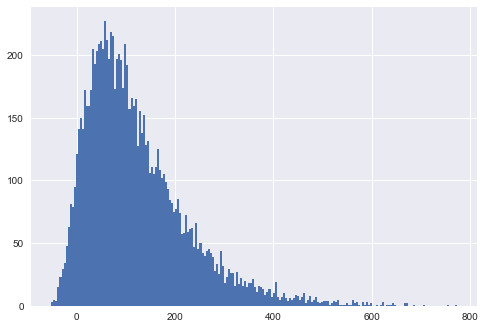

In [174]:
plt.hist(mc2_df.VP0/1000000, bins=200)

In [175]:
mc2_df['ni']=np.log(mc2_df.VP1/VP0_base)
100*mc2_df.describe()

C:\Users\Mesz\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,VP1,VP0,ni
count,1.000000e+06,1.000000e+06,947100.000000
mean,1.298350e+10,1.220938e+10,-26.291874
std,1.118102e+10,1.051437e+10,102.610933
min,-5.488295e+09,-5.161063e+09,-789.012964
25%,5.035081e+09,4.734872e+09,-74.121436
50%,1.045150e+10,9.828343e+09,-10.961638
75%,1.831512e+10,1.722311e+10,42.944011
max,8.231729e+10,7.740924e+10,189.991257


In [176]:
print(mc2_df.ni.mean()+(mc2_df.ni.std()**2)/2)

0.2635314334144139


(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   2.,   0.,   3.,   1.,   0.,   1.,   2.,   0.,   0.,
          0.,   2.,   2.,   2.,   1.,   2.,   0.,   1.,   2.,   1.,   2.,
          1.,   3.,   3.,   1.,   5.,   4.,   2.,   4.,   4.,   0.,   2.,
          2.,   3.,   4.,   4.,   8.,   5.,   2.,   4.,   2.,   2.,   4.,
          7.,   2.,   4.,   4.,   5.,   9.,  14.,   9.,   9.,  12.,  10.,
          8.,   8.,  11.,  10.,  12.,  15.,  19.,  13.,  11.,   8.,  19.,
         21.,  19.,  25.,  15.,  21.,  19.,  23.,  18.,  28.,  23.,  32.,
         30.,  43.,  39.,  37.,  41.,  40.,  42.,  46.,  35.,  53.,  59.,
         56.,  60.,  82.,  74.,  82.,  83.,  86.,  85., 108., 119., 111.,
        121., 123., 140., 146., 162., 

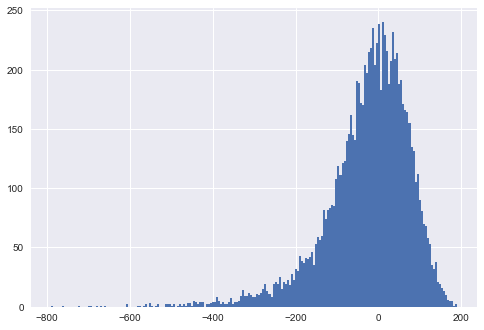

In [177]:
plt.hist(100*mc2_df.ni.dropna(), bins=200)

(array([  3.,   5.,   4.,  15.,  23.,  29.,  34.,  48.,  63.,  81.,  79.,
         95., 121., 141., 150., 141., 172., 159., 159., 172., 205., 193.,
        203., 209., 211., 205., 227., 212., 197., 218., 215., 173., 197.,
        201., 196., 174., 209., 192., 157., 166., 159., 165., 127., 155.,
        138., 152., 128., 131., 106., 111., 105., 111., 125., 108., 102.,
        105.,  99.,  93.,  84.,  82.,  75.,  77.,  85.,  74.,  57.,  58.,
         72.,  59.,  61.,  62.,  47.,  66.,  45.,  50.,  42.,  40.,  44.,
         45.,  42.,  39.,  28.,  33.,  25.,  44.,  32.,  18.,  23.,  29.,
         26.,  26.,  16.,  27.,  17.,  22.,  16.,  20.,  15.,  18.,  18.,
         21.,  15.,  11.,  16.,  15.,  13.,   9.,  11.,  13.,   7.,  10.,
         19.,   7.,   5.,   7.,  10.,   6.,   4.,   6.,   5.,   6.,   9.,
          8.,   5.,   7.,  10.,   2.,   5.,   8.,   3.,   5.,   7.,   3.,
          2.,   3.,   4.,   4.,   4.,   1.,   2.,   4.,   3.,   5.,   1.,
          1.,   1.,   2.,   1.,   1., 

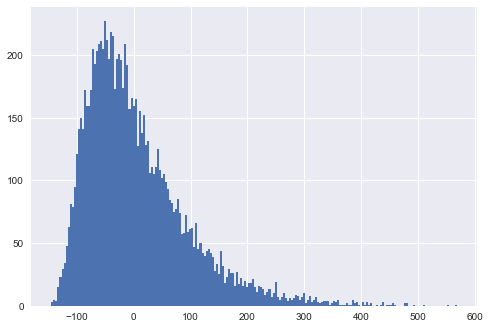

In [178]:
mc2_df['ni2']=(mc2_df.VP1/VP0_base)  -1

plt.hist(100*mc2_df.ni2.dropna(), bins=200)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   2.,   0.,   3.,   1.,   0.,   1.,   2.,   0.,   0.,
          0.,   2.,   2.,   2.,   1.,   2.,   0.,   1.,   2.,   1.,   2.,
          1.,   3.,   3.,   1.,   5.,   4.,   2.,   4.,   4.,   0.,   2.,
          2.,   3.,   4.,   4.,   8.,   5.,   2.,   4.,   2.,   2.,   4.,
          7.,   2.,   4.,   4.,   5.,   9.,  14.,   9.,   9.,  12.,  10.,
          8.,   8.,  11.,  10.,  12.,  15.,  19.,  13.,  11.,   8.,  19.,
         21.,  19.,  25.,  15.,  21.,  19.,  23.,  18.,  28.,  23.,  32.,
         30.,  43.,  39.,  37.,  41.,  40.,  42.,  46.,  35.,  53.,  59.,
         56.,  60.,  82.,  74.,  82.,  83.,  86.,  85., 108., 119., 111.,
        121., 123., 140., 146., 162., 

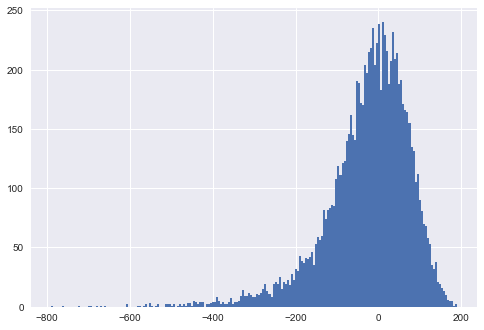

In [179]:
plt.hist(100*mc2_df.ni.dropna(), bins=200)

In [183]:
##############################################################
################Modelo 3######################################
#####################Simulacao de monte carlo####



mc_vp1=[]
mc_vp0=[]
for i in range(10000):
    c3_modelo=teor(teor_C3,media_zn_c3,desvio_zn_c3,media_cu_c3,desvio_cu_c3,0.97, 0.256,0.0832)
    c1_modelo=teor(teor_C1,media,desvio,media_cu_c1,desvio_cu_c1,0.74,0.256,0.0907)
    c4_modelo=teor(teor_C4,media_zn_c4,desvio_zn_c4,media_cu_c4,desvio_cu_c4,0.46,0.236,0.016)
    
    
    ###Teor ano 1
    FC.at[1,'Teor_Zn']=sum(c3_modelo[0][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])
    FC.at[1,'Teor_Cu']=sum(c3_modelo[1][0:3]*c3_modelo[2][0:3])/sum(c3_modelo[2][0:3])

    ##Teor ano2 

    FC.at[2,'Teor_Zn']=sum(c3_modelo[0][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])
    FC.at[2,'Teor_Cu']=sum(c3_modelo[1][3:5]*c3_modelo[2][3:5])/sum(c3_modelo[2][3:5])

    ##Teor ano3 

    FC.at[3,'Teor_Zn']=sum(c3_modelo[0][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])
    FC.at[3,'Teor_Cu']=sum(c3_modelo[1][5:8]*c3_modelo[2][5:8])/sum(c3_modelo[2][5:8])

    ###Teor ano4
    n=sum(c3_modelo[0][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[0][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    FC.at[4,'Teor_Zn']=n/d

    n=sum(c3_modelo[1][8:12]*c3_modelo[2][8:12])+ sum(c1_modelo[1][0:3]*c1_modelo[2][0:3])
    d=sum(c3_modelo[2][8:12])+sum(c1_modelo[2][0:3])
    FC.at[4,'Teor_Cu']=n/d


    ###Teor ano5
    FC.at[5,'Teor_Zn']=sum(c1_modelo[0][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])
    FC.at[5,'Teor_Cu']=sum(c1_modelo[1][2:4]*c1_modelo[2][2:4])/sum(c1_modelo[2][2:4])

    ###Teor ano6
    n=sum(c1_modelo[0][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[0][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    FC.at[6,'Teor_Zn']=n/d

    n=sum(c1_modelo[1][4:10]*c1_modelo[2][4:10]) + sum(c4_modelo[1][0:2]*c4_modelo[2][0:2])
    d=sum(c1_modelo[2][4:10])+ sum(c4_modelo[2][0:2])
    FC.at[6,'Teor_Cu']=n/d


    ####Teor ano 7
    FC.at[7,'Teor_Zn']=sum(c4_modelo[0][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])
    FC.at[7,'Teor_Cu']=sum(c4_modelo[1][2:4]*c4_modelo[2][2:4])/sum(c4_modelo[2][2:4])

    ####Teor ano 8
    FC.at[8,'Teor_Zn']=sum(c4_modelo[0][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])
    FC.at[8,'Teor_Cu']=sum(c4_modelo[1][4:6]*c4_modelo[2][4:6])/sum(c4_modelo[2][4:6])

    ####Teor ano 9

    FC.at[9,'Teor_Zn']=c4_modelo[0][6]*c4_modelo[2][6]/c4_modelo[2][6]
    FC.at[9,'Teor_Cu']=c4_modelo[1][6]*c4_modelo[2][6]/c4_modelo[2][6]


    ####Teor ano 10

    FC.at[10,'Teor_Zn']=sum(c4_modelo[0][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])
    FC.at[10,'Teor_Cu']=sum(c4_modelo[1][7:9]*c4_modelo[2][7:9])/sum(c4_modelo[2][7:9])

    #################################
    ###Precos######
    #simmeio(12,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[3:14]

    #FC.Preco_Zn=simmeio(12,1,P0_zn,eta_zn,alpha_zn,sigma_zn)[3:14]
    FC.Preco_Zn=simmeio(12,1,P0_zn,eta_zn,alpha_zn - lambka[0],sigma_zn)[3:14]


    #FC.Preco_Cu=simmeio(12,1,P0_cu,eta_cu,alpha_cu,sigma_cu)[3:14]
    FC.Preco_Cu=simmeio(12,1,P0_cu,eta_cu,alpha_cu - lambka[1],sigma_cu)[3:14]




    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


    ####################
    ######################Calculuo do VP em 1!!!####################
    #taxa=capm
    taxa=rp+rf    
    VP=0
    for i in range(1,len(FC),1):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i)
    
    VP1=(VP+FC.FC_Oper.iloc[0])*1000
    mc_vp1.append(VP1)
    mc_vp0.append(VP1/(1+taxa))
  







In [184]:
mc3_df=pd.DataFrame(mc_vp1)
mc3_df.columns=['VP1']
mc3_df['VP0']=mc_vp0

In [185]:
mc3_df.to_csv('modelo_3.csv')

In [161]:
#####Exportei e importei a simulacao de MC - Modelo 3 ###################
###########################################################################################
#mc3_df.to_csv('modelo_3.csv')
mc3_df=pd.read_csv('modelo_3.csv',  index_col=0)

(array([  6.,   3.,   2.,  12.,  10.,   8.,  21.,  20.,  28.,  36.,  45.,
         55.,  79.,  65.,  79.,  98., 123., 135., 136., 134., 158., 175.,
        188., 213., 175., 202., 211., 195., 229., 228., 209., 201., 195.,
        217., 216., 231., 188., 206., 175., 187., 230., 195., 201., 202.,
        178., 170., 174., 153., 147., 189., 155., 145., 111., 134., 121.,
        126., 107., 105.,  91., 115., 109.,  90.,  82.,  87.,  82.,  67.,
         70.,  63.,  55.,  63.,  67.,  61.,  51.,  41.,  50.,  44.,  36.,
         47.,  31.,  42.,  39.,  29.,  30.,  30.,  25.,  26.,  26.,  23.,
         28.,  23.,  13.,  17.,  21.,  15.,  15.,  12.,  14.,   8.,  12.,
          7.,   7.,   8.,  15.,   6.,  10.,  12.,   7.,   6.,   5.,   8.,
          3.,   3.,   5.,   4.,   4.,   7.,   5.,   8.,   6.,   3.,   2.,
          1.,   6.,   6.,   5.,   5.,   1.,   5.,   1.,   2.,   0.,   5.,
          2.,   3.,   2.,   3.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,
          2.,   0.,   1.,   0.,   1., 

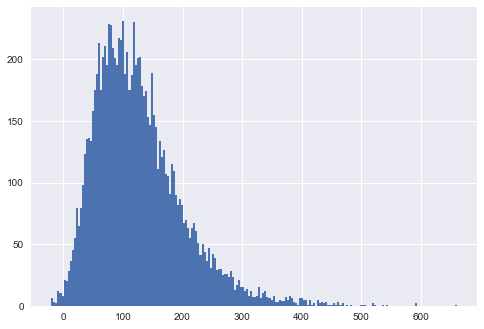

In [186]:
plt.hist(mc3_df.VP0/1000000, bins=200)

In [187]:
mc3_df['ni']=np.log(mc3_df.VP1/VP0_base)
100*mc3_df.describe()

C:\Users\Mesz\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,VP1,VP0,ni
count,1.000000e+06,1.000000e+06,995900.000000
mean,1.343525e+10,1.263419e+10,-9.627583
std,7.916707e+09,7.444685e+09,67.722376
min,-2.161125e+09,-2.032271e+09,-639.257355
25%,7.772178e+09,7.308773e+09,-45.003055
50%,1.216843e+10,1.144291e+10,-0.833255
75%,1.747600e+10,1.643402e+10,35.210224
max,7.034234e+10,6.614828e+10,174.270530


In [188]:
print(mc3_df.ni.mean()+(mc3_df.ni.std()**2)/2)

0.1330401840515567


(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,
          0.,   1.,   1.,   0.,   1.,   2.,   1.,   1.,   2.,   1.,   0.,
          1.,   0.,   1.,   1.,   1.,   2.,   1.,   2.,   1.,   1.,   2.,
          1.,   1.,   1.,   5.,   3.,   6.,   2.,   2.,   1.,   8.,   6.,
          4.,   2.,   4.,   9.,   6.,   3.,  12.,   3.,  12.,  12.,   6.,
         10.,  14.,  14.,  13.,   8.,  19.,  20.,  25.,  23.,  19.,  23.,
         15.,  31.,  23.,  36.,  32.,  42.,  44.,  55.,  62.,  61.,  66.,
         76.,  64.,  80.,  84.,  94., 113., 105., 122., 156., 151., 131.,
        153., 169., 177., 188., 203., 

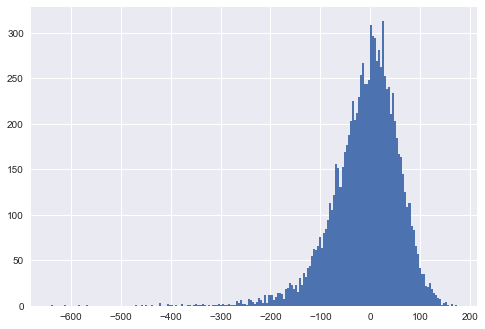

In [189]:
plt.hist(100*mc3_df.ni.dropna(), bins=200)

In [208]:
##############################################################
################Modelo 4######################################
#####################Simulacao de monte carlo####
#####Re ininicializar tabela com fluxos!!####

#####################Simulacao de monte carlo####
mc_vp1=[]
mc_vp0=[]
for i in range(10000):
    
    #################################
    ###Precos######
    #len(list(simmeio(10.5,0.5,P0_zn,eta_zn,alpha_zn,sigma_zn)[i] for i in np.arange(1,21,2)))

    #FC.Preco_Zn=list(simmeio(10.5,0.5,P0_zn,eta_zn,alpha_zn,sigma_zn)[i] for i in np.arange(1,21,2))
    FC.Preco_Zn=list(simmeio(10.5,0.5,P0_zn,eta_zn,alpha_zn - lambka[0],sigma_zn)[i] for i in np.arange(1,21,2))

    #FC.Preco_Cu=list(simmeio(10.5,0.5,P0_cu,eta_cu,alpha_cu,sigma_cu)[i] for i in np.arange(1,21,2))
    FC.Preco_Cu=list(simmeio(10.5,0.5,P0_cu,eta_cu,alpha_cu- lambka[1],sigma_cu)[i] for i in np.arange(1,21,2))




    ######################################
    FC['Receita_Liquida']= FC.Producao_Rocha*(0.75*FC.Teor_Zn*FC.Preco_Zn +0.72*FC.Teor_Cu*FC.Preco_Cu)*0.85/1000
    FC['IR']=0.34*(FC.Receita_Liquida -1*FC.Custo_Operacao -1*FC.Depre)
    FC['FC_Oper']=FC.Receita_Liquida - FC.Custo_Operacao -FC.IR  -0.02*(FC.Receita_Liquida)


    ####################
    ######################Calculuo do VP em 1!!!####################
    #taxa=capm
    taxa=rp+rf
    VP=0
    for i in range(1,len(FC),1):
        VP= VP+ FC.FC_Oper.iloc[i]/np.power((1+taxa),i)
    
    VP1=(VP+FC.FC_Oper.iloc[0])*1000
    mc_vp1.append(VP1)
    mc_vp0.append(VP1/(1+taxa))
  


In [209]:
mc4_df=pd.DataFrame(mc_vp1)
mc4_df.columns=['VP1']
mc4_df['VP0']=mc_vp0

In [210]:
mc4_df.to_csv('modelo_4.csv')

In [165]:
#####Exportei e importei a simulacao de MC - Modelo 4 ###################
###########################################################################################
#mc4_df.to_csv('modelo_4.csv')
mc4_df=pd.read_csv('modelo_4.csv',  index_col=0)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,   1.,
          2.,   1.,   2.,   1.,   3.,   1.,   2.,   3.,   7.,   5.,   7.,
          4.,   3.,   9.,  11.,   6.,  11.,  24.,  15.,  16.,  13.,  23.,
         21.,  31.,  33.,  40.,  35.,  43.,  46.,  37.,  48.,  59.,  52.,
         56.,  60.,  70.,  83.,  88.,  89.,  85.,  95., 107., 118.,  93.,
        105., 122., 142., 122., 144., 167., 135., 145., 135., 172., 154.,
        158., 160., 180., 167., 178., 172., 143., 176., 214., 188., 163.,
        150., 173., 170., 173., 159., 174., 154., 179., 148., 167., 143.,
        148., 162., 140., 145., 136., 122., 133., 100., 118., 113., 107.,
         83., 111., 107.,  86.,  87.,  76.,  83.,  68.,  76.,  66.,  60.,
         63.,  50.,  50.,  50.,  47.,  58.,  46.,  34.,  37.,  33.,  34.,
         24.,  27.,  24.,  23.,  26.,  12.,  16.,  17.,  16.,  15.,   9.,
         10.,  11.,  16.,  19.,  10.,  14.,   9.,   8.,   7.,   5.,   3.,
          4.,   2.,   3.,   7.,   7., 

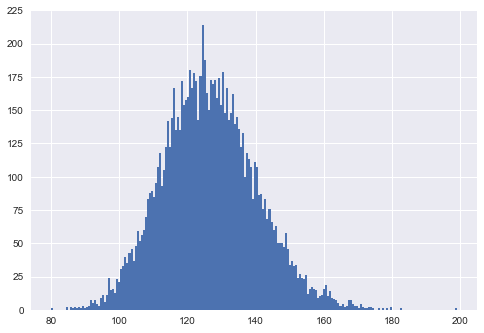

In [211]:
plt.hist(mc4_df.VP0/1000000, bins=200)

In [212]:
mc4_df['ni']=np.log(mc4_df.VP1/VP0_base)
mc4_df['ni2']=(mc4_df.VP1-VP0_base) /VP0_base

100*mc4_df.describe()

,VP1,VP0,ni,ni2
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.345956e+10,1.265705e+10,8.315097,9.310369
std,1.459605e+09,1.372578e+09,10.847823,11.854023
min,8.523733e+09,8.015517e+09,-36.781424,-30.775424
25%,1.244262e+10,1.170074e+10,1.045886,1.051375
50%,1.339089e+10,1.259248e+10,8.390617,8.752685
75%,1.439107e+10,1.353302e+10,15.593917,16.875510
max,2.116932e+10,1.990712e+10,54.188413,71.924309


In [213]:
print(mc4_df.ni.mean()+(mc4_df.ni.std()**2)/2)

0.08903473131139358


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   2.,   1.,   1.,   2.,   2.,   6.,   3.,   5.,   4.,
          3.,   2.,   3.,   5.,   9.,   7.,   4.,   8.,  10.,  18.,  13.,
         11.,  13.,  10.,  19.,  17.,  14.,  29.,  26.,  31.,  27.,  29.,
         37.,  35.,  38.,  23.,  46.,  46.,  42.,  48.,  48.,  53.,  62.,
         65.,  74.,  75.,  67.,  80.,  87.,  93.,  99.,  83.,  81., 106.,
        112., 134.,  98., 128., 149., 122., 126., 118., 150., 154., 140.,
        154., 141., 170., 153., 162., 161., 142., 162., 196., 180., 157.,
        157., 168., 162., 162., 172., 167., 146., 170., 168., 157., 154.,
        152., 160., 150., 142., 146., 130., 130., 123., 116., 120., 115.,
         92., 127., 103.,  98.,  87.,  80.,  88.,  87.,  72.,  67.,  69.,
         58.,  57.,  53.,  55.,  66.,  43.,  40.,  39.,  37.,  28.,  36.,
         28.,  22.,  20.,  17.,  26., 

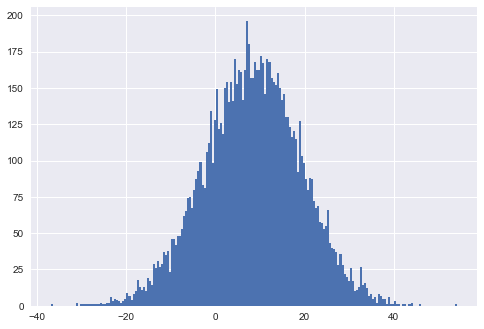

In [214]:
plt.hist(100*mc4_df.ni.dropna(), bins=200)

In [236]:
hg4=pd.read_csv('CHRIS-CME_HG4.csv')

In [237]:
hg4.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2020-01-15,2.8535,2.8725,2.850,2.8705,0.0070,2.8710,100.0,1799.0
1,2020-01-14,2.8590,2.8775,2.858,2.8775,0.0125,2.8780,184.0,1732.0
2,2020-01-13,2.8230,2.8650,2.823,2.8650,0.0475,2.8655,52.0,1704.0
3,2020-01-10,2.8140,2.8395,2.808,2.8170,0.0110,2.8180,39.0,1706.0
4,2020-01-09,2.8205,2.8205,2.800,2.8000,0.0100,2.8070,30.0,1699.0


In [238]:
hg6=pd.read_csv('CHRIS-CME_HG6.csv')

In [239]:
hg6.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2020-01-15,2.8720,2.880,2.8720,2.878,0.0070,2.8785,6.0,669.0
1,2020-01-14,2.8650,2.880,2.8650,2.880,0.0135,2.8855,8.0,666.0
2,2020-01-13,2.8255,2.871,2.8255,2.871,0.0470,2.8720,25.0,655.0
3,2020-01-10,2.8160,2.837,2.8160,2.825,0.0105,2.8250,9.0,655.0
4,2020-01-09,2.8240,2.824,2.8135,2.815,0.0095,2.8145,17.0,655.0


In [240]:
future=0.02 - 12*np.log((hg6.Last)/hg4.Last)

In [241]:
np.mean(future)

0.17113257324889397

(array([   6.,   19.,   17.,   14.,   12.,   24.,   35.,   63.,  100.,
         105.,  149.,  256.,  415., 1227.,  929.,  287.,  244.,  201.,
         176.,  202.,  141.,   90.,   50.,   26.,   14.,   12.,    9.,
           5.,    5.,    4.]),
 array([-6.18907026, -5.74784831, -5.30662636, -4.86540441, -4.42418247,
        -3.98296052, -3.54173857, -3.10051662, -2.65929468, -2.21807273,
        -1.77685078, -1.33562884, -0.89440689, -0.45318494, -0.01196299,
         0.42925895,  0.8704809 ,  1.31170285,  1.7529248 ,  2.19414674,
         2.63536869,  3.07659064,  3.51781258,  3.95903453,  4.40025648,
         4.84147843,  5.28270037,  5.72392232,  6.16514427,  6.60636622,
         7.04758816]),
 <a list of 30 Patch objects>)

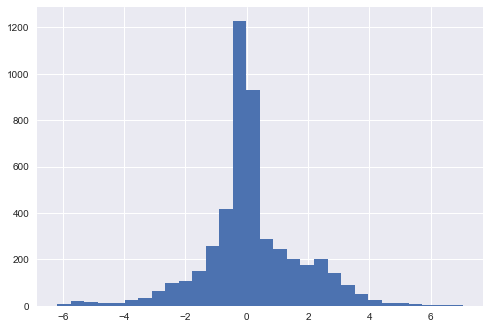

In [246]:
plt.hist(future.dropna(), bins=30)

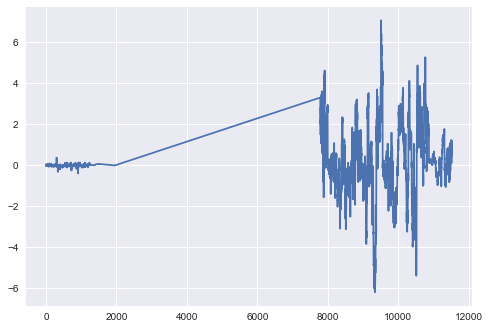

In [248]:
plt.plot(future.dropna())